# **Latar Belakang**

Transjakarta, didirikan tahun 2004, merupakan sistem Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan. Saat ini, Transjakarta melayani lebih dari 250 juta penumpang per tahun dengan 13 koridor utama dan 260 halte. Dibandingkan moda transportasi lain, Transjakarta memiliki beberapa keunggulan, seperti tarif yang relatif terjangkau, jalur khusus bebas macet, armada bus modern dan nyaman, serta sistem pembayaran yang mudah dan terintegrasi.

## Pernyataan Masalah

Dengan populasi lebih dari 10 juta jiwa, Jakarta mengalami kemacetan yang parah. Transjakarta (df) didirikan untuk mengatasi masalah ini. Meskipun efeknya belum signifikan, analisis data dan saran untuk optimalisasi df akan dipaparkan dalam tulisan ini.

*Analisis data eksploratif* (EDA) dilakukan untuk memahami jadwal rute df di Jakarta. Hasilnya akan digunakan untuk memberikan saran peningkatan performa, termasuk penambahan armada.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Dataset ini menyajikan informasi demografis pengguna Transjakarta pada tahun 2021, yang dikategorikan berdasarkan jenis kendaraan. Dataset "TransJakarta Passengers 2021" terdiri dari 22 kolom, yaitu:

1. **transID**: Unique transaction id for every transaction
2. **payCardID**: Customers main identifier. The card customers use as a ticket for entrance and exit.
3. **payCardBank**: Customers card bank issuer name
4. **payCard** Name: Customers name that is embedded in the card.
5. **payCardSex**: Customers sex that is embedded in the card
6. **payCard Birth Date**: Customers birth year
7. **corridorID**: Corridor ID / Route ID as key for route grouping.
8. **corridorName**: Corridor Name / Route Name contains Start and Finish for each route
9. **direction**: 0 for Go, 1 for Back. Direction of the route.
10. **tapinStops**: Tap In (entrance) Stops ID for identifying stops name
11. **tapinStops** Name: Tap In (entrance) Stops Name where customers tap in.
12. **tapinStopsLat**: Latitude of Tap In Stops
13. **tapinStopslon**: Longitude of Tap In Stops
14. **stopStartSeq**: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15. **tapinTime**: Time of tap in. Date and time
16. **tapOutStops**: Tap Out (Exit) Stops ID for identifying stops name
17. **tapOutStops** Name: Tap out (exit) Stops Name where customers tap out.
18. **tapOutStopsLat**: Latitude of Tap Out Stops
19. **tapOutStopsLon**: Longitude of Tap Out Stops
20. **stopEndSeq**: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21. **tapOutTime**: Time of tap out. Date and time
22. **payAmount**: The number of what customers pay. Some are free. Some not.

Berikut adalah 5 data teratas dan terbawah dari dataset "TransJakarta Passengers 2021".

## **Berikut 5 Baris teratas dan terbawah dari dataset Transjakarta**

In [ ]:
df = pd.read_csv('Transjakarta(origin).csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008.0,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7.0,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997.0,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13.0,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992.0,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38.0,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978.0,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23.0,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982.0,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5.0,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
26562,FSYK423G3P89WY,4551895931872012,dki,R. Balapati Usada,M,1982.0,11Q,Kampung Melayu - Pulo Gebang via BKT,1.0,B02070P,...,106.90531,11.0,2023-04-21 20:35:59,NaN,Dinas Kebersihan Duren Sawit,-6.219815,106.92338,20.0,2023-04-21 22:34:35,3500.0
26563,NJFW496H5M23LT,2224519731151218,dki,Puput Mardhiyah,M,1997.0,JIS3,Harmoni - Jakarta International Stadium,1.0,P00097,...,106.83089,7.0,2023-04-21 18:18:28,B01745P,Jembatan Item,-6.130078,106.85492,13.0,2023-04-21 19:45:16,3500.0
26564,KWIJ917U8Z12FD,4165770694718959,dki,Himawan Putra,M,1957.0,6V,NaN,1.0,P00048,...,106.82213,15.0,2023-04-21 17:09:01,P00199,Ragunan,-6.305769,106.81949,16.0,2023-04-21 18:16:08,3500.0
26565,MMSF966Z2L59TG,4400887914495,online,Darmanto Saragih,F,1968.0,D21,Universitas Indonesia - Lebak Bulus,0.0,B05514P,...,106.83396,2.0,2023-04-21 18:54:39,B00821P,Jagakarsa St. Lenteng Agung,-6.332399,106.83506,4.0,2023-04-21 20:19:58,3500.0
26566,FOGI595R2F61TS,6011114900479836,dki,dr. Bala Kusmaw,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Understanding**

Sebelum melakukan analisis, penting untuk memahami dataset Transjakarta terlebih dahulu melalui tahap *data understanding* (Pemahaman Data). Tahap ini memungkinkan kita untuk mengidentifikasi anomali dalam dataset dan menanganinya dalam tahap *data cleaning* (pembersihan data). Setiap langkah penanganan anomali akan dijustifikasi berdasarkan *domain knowledge* dan statistik.

Berikut adalah informasi yang terdapat dalam dataset Transjakarta:

## 1. Informasi Umum

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (26567, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26567 entries, 0 to 26566
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           26567 non-null  object 
 1   payCardID         26567 non-null  int64  
 2   payCardBank       26567 non-null  object 
 3   payCardName       26567 non-null  object 
 4   payCardSex        26566 non-null  object 
 5   payCardBirthDate  26566 non-null  float64
 6   corridorID        25682 non-null  object 
 7   corridorName      25217 non-null  object 
 8   direction         26566 non-null  float64
 9   tapInStops        25733 non-null  object 
 10  tapInStopsName    26566 non-null  object 
 11  tapInStopsLat     26566 non-null  float64
 12  tapInStopsLon     26566 non-null  float64
 13  stopStartSeq      26566 non-null  float64
 14  tapInTime         26566 non-null  object 
 15  tapOutStops       24964 non-nul

In [ ]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,2.656700e+04,26566.000000,26566.000000,26566.000000,26566.000000,26566.000000,25614.000000,25614.000000,25614.000000,25878.000000
mean,4.454228e+17,1990.085523,0.498683,-6.215121,106.840882,13.486863,-6.214737,106.840503,21.107480,2695.726099
std,1.352661e+18,12.941781,0.500008,0.057655,0.060122,12.016306,0.058690,0.060699,13.607357,4167.652793
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.391068,106.614730,1.000000,0.000000
25%,1.800573e+14,1982.000000,0.000000,-6.245863,106.802860,4.000000,-6.247708,106.801180,11.000000,0.000000
50%,3.513475e+15,1990.000000,0.000000,-6.214956,106.834270,11.000000,-6.214956,106.833470,18.000000,3500.000000
75%,4.704902e+15,2000.000000,1.000000,-6.176162,106.882140,19.000000,-6.175292,106.882160,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,65.000000,-6.091746,107.023660,73.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,26567,26567,26567,26566,25682,25217,25733,26566,26566,24964,25614,25614
unique,26567,6,799,2,214,210,1153,1153,25955,1077,1076,25147
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-07 17:23:31,P00016,BKN,2023-04-07 19:44:04
freq,1,13197,70,13939,316,311,176,182,3,236,243,3


## 2. Identifikasi Jumlah Unique Data dan Persentase *missing Value* Pada Dataset.

In [ ]:
pd.set_option('display.max_colwidth', 0)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), round((df[col].isna().sum()/len(df)*100),2), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique','Percentage of *missing Value*', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Percentage of *missing Value*,Unique Sample
0,transID,26567,0.00,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,800,0.00,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,0.00,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,799,0.00,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, M

## 3. Berdasarkan data yang ada, terlihat bahwa:

- Dataset Transjakarta memiliki 22 kolom dan 37.900 baris.
- Beberapa kolom, yaitu `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`,`stopEndSeq`,`tapOutTime`, dan `payAmount` memiliki data kosong yang diwakili dengan NaN.
- Kolom `payAmount` apabila di sinkronkan dengan `corridorID` bisa menjawab jenis moda transportasi yang digunakan,
  1. 0 = Jak lingko
  2. 3500 = Transjakarta
  3. 20000 = Transjakarta antar kota.
- kolom `tapInTime` dan `tapOutTime` karena masih dalam bentuk object perlu diubah formatnya
- kolom latitude dan longitude bisa di drop karena penggunaan visualisasi heatmap hanya opsional.

# **Data Cleaning**

Proses ini penting untuk memastikan data yang kita analisa akurat dan bisa diandalkan.  Dengan membuang data yang salah, tidak lengkap, atau duplikat hasil analisis kita akan lebih akurat.

## 1. Menghitung dan Menghapus Data Duplikat (Jika Ada)

In [ ]:
df.duplicated().sum()

0

## 2. Menghitung *missing Values*

In [ ]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          1   
payCardBirthDate    1   
corridorID          885 
corridorName        1350
direction           1   
tapInStops          834 
tapInStopsName      1   
tapInStopsLat       1   
tapInStopsLon       1   
stopStartSeq        1   
tapInTime           1   
tapOutStops         1603
tapOutStopsName     953 
tapOutStopsLat      953 
tapOutStopsLon      953 
stopEndSeq          953 
tapOutTime          953 
payAmount           689 
dtype: int64

Terdapat dua cara untuk menangani *missing Value* dalam dataset:

**1. Menghapus baris/kolom yang mengandung *missing value*:**

Cara ini tidak direkomendasikan dalam kasus ini karena data yang hilang masih dapat diprediksi dan diisi dengan informasi dari kolom lain.

**2. Mengisi data yang hilang:**

Cara ini lebih disarankan karena memungkinkan kita untuk memanfaatkan semua data yang tersedia. Berikut beberapa teknik untuk mengisi *missing Value*:

- Mengisi dengan nilai sebenarnya:
Prioritaskan pengisian *missing Value* dengan nilai yang sebenarnya, jika memungkinkan. Hal ini dapat dilakukan dengan mencari informasi dari sumber lain atau melalui proses analisis data yang lebih mendalam.

- Mengisi dengan nilai terdekat:
Jika nilai sebenarnya tidak tersedia, isi *missing Value* dengan nilai terdekat yang dapat diestimasi. Teknik ini dapat dilakukan dengan menggunakan rata-rata, median, atau nilai dari kolom lain yang memiliki hubungan.

- Mengisi dengan nilai yang relevan:
Pada kasus data bertipe objek, *missing Value* dapat diisi dengan nilai yang relevan dari kolom lain yang memiliki keterkaitan. Contohnya, jika corridorID memiliki *missing Value*, nilai corridorName pada baris yang sama dapat digunakan untuk mengisi kekosongan.

**Penting untuk diingat bahwa:**
Teknik terbaik untuk mengisi *missing Value* tergantung pada jenis data, distribusi data, dan tujuan analisis.
Melakukan analisis data tanpa menangani *missing Value* dapat menghasilkan kesimpulan yang tidak akurat.
Dengan memilih metode yang tepat untuk menangani *missing Value*, kita dapat memastikan kualitas data dan mendapatkan hasil analisis yang lebih akurat.

### **1. Cleaning `corridorName` & `corridorID`**


#### **Anomali Check**

In [ ]:
df['corridorID'].unique()

array(['5', '6C', 'R1A', '11D', '12', '1T', 'JAK.18', nan, 'B14', '1Q',
       '5M', 'M7B', '9A', '4', 'JAK.46', 'S22', '13', '9E', 'M9',
       'JAK.88', 'T11', 'JAK.16', '6V', '11Q', 'JAK.02', '11', '1C', '3B',
       'M1', '7E', '1P', '7D', '6H', '14', 'BW9', 'JIS3', '2', 'JAK.15',
       '6N', 'M11', 'JAK.112', '9N', 'JAK.43B', 'JAK.42', '7P', 'JAK.36',
       '13B', 'JAK.06', 'JAK.14', 'M7', 'T21', '12A', '9D', '1', '3A',
       '3C', 'M8', 'B21', 'JAK.71', 'JAK.77', 'M3', 'JAK.44', 'JAK.48B',
       '8K', 'JAK.19', 'M10', '10D', 'JAK.75', 'B11', 'JAK.52', 'JAK.37',
       'JAK.31', '11M', 'JAK.43C', '2F', '8C', 'M2', '12B', '5D',
       'JAK.117', '3H', 'JAK.49', '7A', '7Q', 'JAK.20', '1M', 'JAK.118',
       '5C', 'JAK.27', '6Q', '4E', 'JAK.13', 'JAK.84', '2H', 'JAK.08',
       '8E', 'JAK.23', '6M', 'JAK.07', 'JAK.22', 'JAK.115', 'JAK.21',
       'JAK.26', 'L13E', '12P', 'JAK.64', 'JAK.47', '1F', '12C', '13C',
       'JAK.01', 'JAK.120', '4B', '7C', 'JAK.85', '11N', 'JAK.10', '2E

Dalam Kolom `corridorId` menunjukkan beberapa nilai unique yang mirip, seperti "2" dan "M2". Untuk mengidentifikasi anomali ini, saya melakukan beberapa langkah

korelasi `corridorName` dan `corridorID` dengan `corridorName` yang memiliki lebih dari 1 `corridorID`

In [ ]:
grouped = df.groupby('corridorName')['corridorID'].nunique()
grouped[grouped > 1]

corridorName
Blok M - Kota                          2
Kalideres - Bundaran HI via Veteran    2
Pinang Ranti - Pluit                   2
Pulo Gadung - Monas                    2
Name: corridorID, dtype: int64

Identifikasi anomali data

In [ ]:
df.query("corridorName in ['Blok M - Kota', 'Kalideres - Bundaran HI via Veteran','Matraman Baru - Ancol', 'Pinang Ranti - Pluit','Pulo Gadung - Monas','Pulo Gadung - Monas']")[['corridorID', 'corridorName']].value_counts()

corridorID  corridorName                       
2           Pulo Gadung - Monas                    217
5           Matraman Baru - Ancol                  188
1           Blok M - Kota                          184
M3          Kalideres - Bundaran HI via Veteran    143
3           Kalideres - Bundaran HI via Veteran    102
M9          Pinang Ranti - Pluit                   92 
M1          Blok M - Kota                          39 
M2          Pulo Gadung - Monas                    38 
9           Pinang Ranti - Pluit                   29 
Name: count, dtype: int64

Dari hasil yang didapatkan diatas, dapat disimpulkan bahwa value
1 = M1
2 = M2
3 = M3
5 = M5
9 = M9
Berdasarkan kesimpulan yang diperoleh, saya akan melakukan beberapa perubahan.

In [ ]:
df['corridorID'].replace('M1','1',inplace=True)

In [ ]:
df['corridorID'].replace('M2','2',inplace=True)

In [ ]:
df['corridorID'].replace('M3','3',inplace=True)

In [ ]:
df['corridorID'].replace('M5','5',inplace=True)

In [ ]:
df['corridorID'].replace('M9','9',inplace=True)

Memastikan sudah tidak ada anomali

In [ ]:
grouped = df.groupby('corridorName')['corridorID'].nunique()
grouped[grouped > 1]

Series([], Name: corridorID, dtype: int64)

#### **Fixing *missing Value***

mengisi kolom `corridorID` dengan .filna(method='ffill') yang berfungsi untuk
mengisi kan *missing value* berdasarkan data yang berkesinambungan dengan kolom `corridorName` diatas data *missing value* itu sendiri. Begitu juga sebaliknya dengan kolom `corridorName`.

Kesinambungan antara kolom `corridorName` dan `corridorID` menggunakan `corridorID` sebagai pivot *missing Value* nya

In [ ]:
df.loc[(df['corridorName'] == 'Kampung Rambutan - Blok M') | (df['corridorID'].isna()) & (df['corridorID']=='7B'), ['corridorName', 'corridorID']]

,corridorName,corridorID


In [ ]:
df.loc[(df['corridorID'] == '2') | (df['corridorName'].isna()) & ((df['corridorName']=='Pulo Gadung - Monas')), ['corridorName', 'corridorID']]

,corridorName,corridorID
39,NaN,2
48,Pulo Gadung - Monas,2
92,Pulo Gadung - Monas,2
339,Pulo Gadung - Monas,2
348,Pulo Gadung - Monas,2
...,...,...
26231,Pulo Gadung - Monas,2
26344,Pulo Gadung - Monas,2
26413,Pulo Gadung - Monas,2
26433,Pulo Gadung - Monas,2


Berdasarkan dua tabel yang diperlihatkan, terdapat keterkaitan yang kuat antara kolom `corridorName` dan `corridorID`. Hal ini menunjukkan bahwa *missing value* pada kolom `corridorID` dapat diprediksi dan diisi dengan nilai `corridorName` yang berkesinambungan menggunakan .fillna(method='ffill') yang fungsinya mengisi *missing value* dari data pattern yang sudah ada dengan groupby `corridorID` sebagai acuan

In [ ]:
df['corridorName'] = df.groupby('corridorID')['corridorName'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

Memastikan sudah tidak ada anomali

In [ ]:
grouped = df.groupby('corridorName')['corridorID'].nunique()
grouped[grouped > 1]

Series([], Name: corridorID, dtype: int64)

In [ ]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          1   
payCardBirthDate    1   
corridorID          885 
corridorName        885 
direction           1   
tapInStops          834 
tapInStopsName      1   
tapInStopsLat       1   
tapInStopsLon       1   
stopStartSeq        1   
tapInTime           1   
tapOutStops         1603
tapOutStopsName     953 
tapOutStopsLat      953 
tapOutStopsLon      953 
stopEndSeq          953 
tapOutTime          953 
payAmount           689 
dtype: int64

Dari jumlah *missing Value* diatas, ternyata masih ada *missing Value* pada kolom `corridorID` dan `corridorName`. Untuk Langkah berikutnya saya akan menggunakan *heatmap* untuk memvisualisasikan sebaran *missing Value* dalam dataframe.

<Axes: >

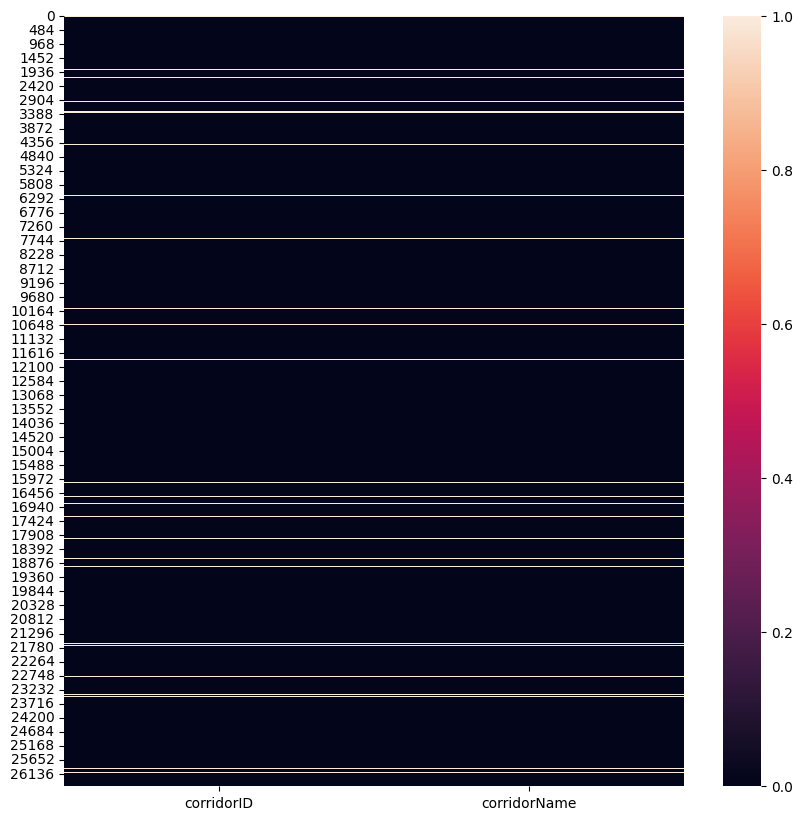

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName']].isna())

Berdasarkan grafik di atas, terlihat bahwa kolom `corridorID` dan `corridorName` memiliki *missing Value* pada baris yang sama. Saya akan mencoba mengidentifikasi *missing Value* pada kolom `corridorID` dan `corridorName` dengan membandingkan value pada kolom `tapInStopsName` dan `tapOutStopsName`.

In [ ]:
df.query("tapInStopsName in ['Penjaringan', 'Rusun Penjaringan', 'Rusun Kapuk Muara']")[['tapInStopsName', 'corridorName']].value_counts()

tapInStopsName     corridorName                   
Rusun Kapuk Muara  Rusun Kapuk Muara - Penjaringan    105
Penjaringan        Rusun Kapuk Muara - Penjaringan    97 
                   Rusun Penjaringan - Penjaringan    43 
Rusun Penjaringan  Rusun Penjaringan - Penjaringan    42 
Penjaringan        Tanjung Priok - Pluit              35 
Name: count, dtype: int64

Berdasarkan data di atas, terlihat bahwa terdapat satu value `corridorName` yang memiliki lebih dari satu `tapInStopsName`. Hal ini menunjukkan bahwa kolom `tapInStopsName` tidak dapat dijadikan acuan untuk mengisi *missing value* pada kolom `corridorName`. Saya akan coba menggabungkan `tapInStopsName` dan `tapOutStopsName` untuk membuat acuan dalam pengisian *missing value* pada kolom `corridorName`.

In [ ]:
df['tapInOutStopsName']=df['tapInStopsName'] + " - " + df['tapOutStopsName']

Pengecheckan unique `corridorName` dengan kolom baru `tapInOutStopsName`

In [ ]:
grouped = df.groupby('corridorName')['tapInOutStopsName'].nunique()
grouped[grouped > 1].sort_values()

corridorName
St. LRT Pegangsaan Dua - JIS                   2 
Stasiun Tebet - BNN                            2 
Stasiun Manggarai - Blok M                     2 
Ragunan - MH Thamrin                           2 
Kp. Rambutan - Taman Wiladatika                2 
                                              .. 
Kebayoran Lama - Tanah Abang                   16
Kampung Rambutan - Pondok Gede                 16
Rusun Pondok Bambu - Walikota Jakarta Timur    16
Ciputat - CSW                                  18
Cibubur - Balai Kota                           19
Name: tapInOutStopsName, Length: 210, dtype: int64

Berdasarkan data, terdapat lebih dari satu unique value pada kolom `tapInOutStopsName` untuk setiap `corridorName`. Hal ini menunjukkan bahwa pengisian *missing Value* pada `corridorName` dan `corridorID` berdasarkan `tapInOutStopsName` tidak tepat dan dapat menghasilkan data yang tidak akurat. Solusi yang dipilih adalah dengan menghapus sisa *missing Value* pada `corridorName` dan `corridorID`. Hal ini dilakukan setelah memperbaiki *missing Value* pada kolom `payAmount`.

In [ ]:
df.isna().sum()

transID              0   
payCardID            0   
payCardBank          0   
payCardName          0   
payCardSex           1   
payCardBirthDate     1   
corridorID           885 
corridorName         885 
direction            1   
tapInStops           834 
tapInStopsName       1   
tapInStopsLat        1   
tapInStopsLon        1   
stopStartSeq         1   
tapInTime            1   
tapOutStops          1603
tapOutStopsName      953 
tapOutStopsLat       953 
tapOutStopsLon       953 
stopEndSeq           953 
tapOutTime           953 
payAmount            689 
tapInOutStopsName    953 
dtype: int64

### **2. Cleaning `payAmount`**

Setelah kolom `corridorID` dan `corridorName` terisi, kedua kolom tersebut dapat digunakan sebagai acuan untuk mengisi kolom `paymentAmount`. Pengisian `paymentAmount` akan dilakukan dengan metode yang sama seperti yang digunakan untuk mengisi `corridorID` dan `corridorName`

Jika diperhatikan *missing value* bisa di isi dengan value yang sudah ada dengan menyamakan value pada kolom `corridorID`

In [ ]:
df.loc[(df['corridorID'] == 'B14') | (df['payAmount'].isna()) , ['corridorID', 'corridorName', 'payAmount']]

,corridorID,corridorName,payAmount
8,B14,Bekasi Barat - Kuningan,20000.0
11,M7B,BKN - Blok M,NaN
76,JAK.48B,Stasiun Tebet - Kampung Melayu,NaN
97,3H,Jelambar - Kota,NaN
169,M7B,BKN - Blok M,NaN
...,...,...,...
26410,M7B,BKN - Blok M,NaN
26464,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,NaN
26512,M7B,BKN - Blok M,NaN
26530,M1H,Tanah Abang - St. Gondangdia,NaN


Pengecheckan unique `corridorID` dan `corridorName` yang memiliki *missing value* pada `payAmount`

In [ ]:
missing_pay_amount = df[df['payAmount'].isna()]
unique_corridor_ids = missing_pay_amount['corridorID'].unique()
unique_corridor_names = missing_pay_amount['corridorName'].unique()

print("Unique Corridor IDs with Missing PayAmount:")
print(unique_corridor_ids)

print("\nUnique Corridor Names with Missing PayAmount:")
print(unique_corridor_names)

Unique Corridor IDs with Missing PayAmount:
['M7B' 'JAK.48B' '3H' 'JAK.48A' 'M1H' nan]

Unique Corridor Names with Missing PayAmount:
['BKN - Blok M' 'Stasiun Tebet - Kampung Melayu' 'Jelambar - Kota'
 'Stasiun Tebet - Rusun Karet Tengsin' 'Tanah Abang - St. Gondangdia' nan]


Pengecheckan value `corridorName` diatas apa kah memiliki value pada kolom `payAmount`

In [ ]:
df.query("corridorName in ['Blok M - Kota', 'BKN - Blok M', 'Stasiun Tebet - Kampung Melayu', 'Jelambar - Kota','Stasiun Tebet - Rusun Karet Tengsin', 'Tanah Abang - St. Gondangdia']")[['payAmount', 'corridorName']].value_counts()

payAmount  corridorName 
3500.0     Blok M - Kota    229
Name: count, dtype: int64

Pengecheckan value `corridorID` diatas apa kah memiliki value pada kolom `payAmount`

In [ ]:
df.query("corridorID in ['1', 'JAK.48B', '3H', 'JAK.48A', 'M1H']")[['payAmount', 'corridorID']].value_counts()

payAmount  corridorID
3500.0     1             229
Name: count, dtype: int64

Berdasarkan data diatas, maka :
1. Penggunaan fungsi ffill() tidak tepat untuk mengisi *missing Value* pada kolom `payAmount`.
2. Berdasarkan data lapangan, diasumsikan bahwa semua penumpang non-JAK Lingko memiliki tarif Rp 3.500 dan penumpang JAK Lingko mendapatkan tarif gratis.
3. *Missing value* pada kolom `payAmount` akan digantikan dengan nilai Rp 3.500 untuk penumpang non-JAK Lingko dan Rp 0 untuk penumpang JAK Lingko.

Merubah NaN dengan kondisi `corridorID` == 3H M1H dengan 3500

In [ ]:
df['payAmount'] = np.where((df['corridorID'] == '3H') | (df['corridorID'] == 'M1H'), 3500, df['payAmount'])

Merubah NaN dengan kondisi `corridorID` == JAK.48B JAK.48A dengan 0


In [ ]:
df['payAmount'] = np.where((df['corridorID'] == 'JAK.48B') | (df['corridorID'] == 'JAK.48A'), 0, df['payAmount'])

karena sudah trial and errror menggunakan kondisi dari `corridorID`== Merubah NaN dengan kondisi `corridorName` == 'BKN - Blok M' dengan 3500

In [ ]:
df['payAmount'] = np.where(df['corridorID'] == 'M78B', 3500, df['payAmount'])

Pengecheckan unique `corridorID` dan `corridorName` yang memiliki *missing value* pada `payAmount`

In [ ]:
missing_pay_amount = df[df['payAmount'].isna()]
unique_corridor_ids = missing_pay_amount['corridorID'].unique()
unique_corridor_names = missing_pay_amount['corridorName'].unique()

print("Unique Corridor IDs with Missing PayAmount:")
print(unique_corridor_ids)

print("\nUnique Corridor Names with Missing PayAmount:")
print(unique_corridor_names)

Unique Corridor IDs with Missing PayAmount:
['M7B' nan]

Unique Corridor Names with Missing PayAmount:
['BKN - Blok M' nan]


dikarenakan penggunakan acuan dari kolom `corridorID` tidak merubah, saya mencoba dengan acuan `corridorName`

In [ ]:
df['payAmount'] = np.where(df['corridorName'] == 'BKN - Blok M', 3500, df['payAmount'])

Pengecheckan unique corridorID dan corridorName yang memiliki *missing Value* pada payAmount

In [ ]:
missing_pay_amount = df[df['payAmount'].isna()]
unique_corridor_ids = missing_pay_amount['corridorID'].unique()
unique_corridor_names = missing_pay_amount['corridorName'].unique()

print("Unique Corridor IDs with Missing PayAmount:")
print(unique_corridor_ids)

print("\nUnique Corridor Names with Missing PayAmount:")
print(unique_corridor_names)

Unique Corridor IDs with Missing PayAmount:
[nan]

Unique Corridor Names with Missing PayAmount:
[nan]


Memeriksa Sebaran *missing value* di dalam data setelah mengisi *missing value* pada kolom `corridorID` dan `corridorName`

<Axes: >

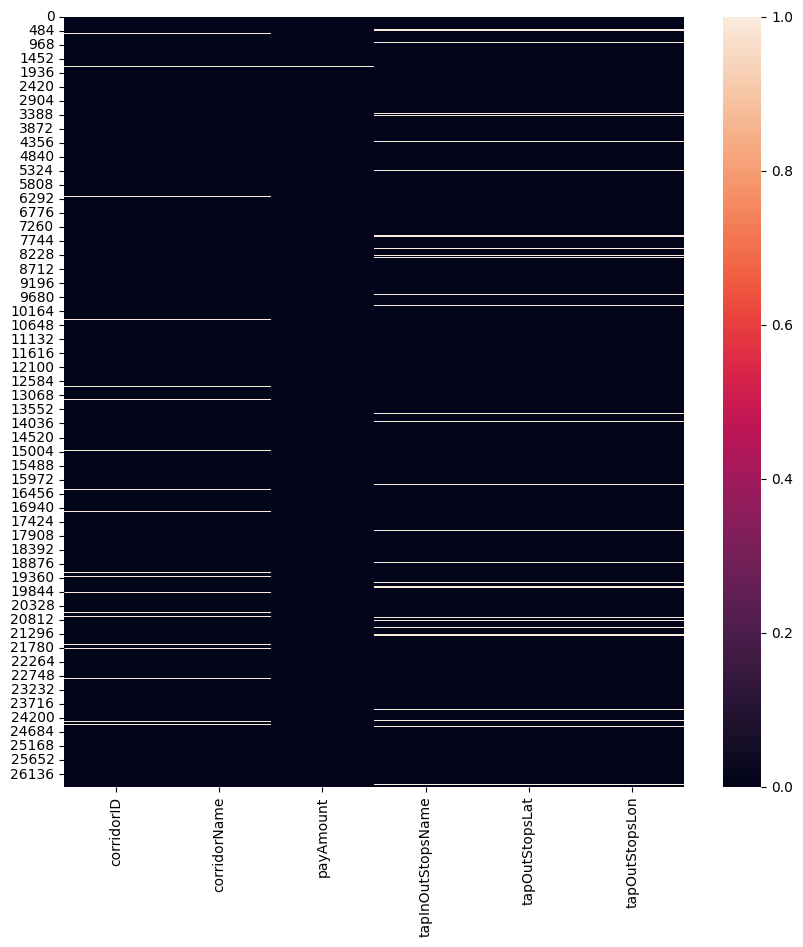

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','payAmount', 'tapInOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']].isna())

Sebaran *missing value* diatas menunjukkan bahwa *missing value* pada kolom `payAmount` selalu muncul bersama dengan *missing value* pada kolom `corridorID` dan `corridorName`. Meskipun terdapat nilai pada kolom `tapInOutStopsName`, `tapOutStopsLat`, dan `tapOutStopsLon`, value tersebut tidak dapat digunakan untuk mengisi *missing value* pada kolom `corridorID`, `corridorName`, dan `payAmount`. Hal ini akan berakibat pada hilangnya data pada kolom-kolom tersebut yang akan berdampak dengan sisa *missing value* di kolom `payAmount`.

Meskipun *missing value* pada kolom `payAmount` telah diperbaiki, masih terdapat beberapa *missing value* yang tidak dapat diidentifikasi penyebabnya.  Oleh karena itu, diputuskan untuk menghapus baris yang mengandung *missing value* pada kolom `payAmount`

Pengecekan `tapInStops`


In [ ]:
grouped = df.groupby('tapInStopsName')['tapInStops'].nunique()
grouped[grouped > 1]

Series([], Name: tapInStops, dtype: int64)

Drop sisa *Missing Value* pada kolom `corridorI`' dan `corridorName`

In [ ]:
df.dropna(subset=['corridorID'],inplace=True)

Mengecheck *missing value* setelah memperbaiki kolom `corridorID` `corridorName` dan `payAmount`

In [ ]:
df.isna().sum()

transID              0   
payCardID            0   
payCardBank          0   
payCardName          0   
payCardSex           0   
payCardBirthDate     0   
corridorID           0   
corridorName         0   
direction            0   
tapInStops           806 
tapInStopsName       0   
tapInStopsLat        0   
tapInStopsLon        0   
stopStartSeq         0   
tapInTime            0   
tapOutStops          1537
tapOutStopsName      909 
tapOutStopsLat       909 
tapOutStopsLon       909 
stopEndSeq           909 
tapOutTime           909 
payAmount            0   
tapInOutStopsName    909 
dtype: int64

### **3. Cleaning `tapInStops`**

Langkah pertama yang dilakukan adalah mengidentifikasi unique value yang terdapat pada kolom `tapInStops`.

In [ ]:
grouped = df.groupby('tapInStopsName')['tapInStops'].nunique()
grouped[grouped > 1]

Series([], Name: tapInStops, dtype: int64)

Pengecheckan unique value pada 'tapOutStopsName'=='Dukuh Atas'

In [ ]:
df.query("tapInStopsName in ['Dukuh Atas']")[['tapInStopsName', 'tapInStops']].value_counts()

tapInStopsName  tapInStops
Dukuh Atas      P00051        49
Name: count, dtype: int64

In [ ]:
df[['tapInStopsName', 'tapInStops']][df['tapInStopsName']=='Dukuh Atas']

,tapInStopsName,tapInStops
358,Dukuh Atas,P00051
442,Dukuh Atas,P00051
958,Dukuh Atas,P00051
1042,Dukuh Atas,P00051
1558,Dukuh Atas,P00051
1642,Dukuh Atas,P00051
2158,Dukuh Atas,P00051
2242,Dukuh Atas,P00051
2758,Dukuh Atas,P00051
2842,Dukuh Atas,P00051


Dari data diatas, untuk mengisi *missing Value* di `tapInStops` dapat di isi dengan `tapInStopsName`

Langkah Selanjutnya, mengelompokkan data berdasarkan `corridorID` dan `corridorName`, lalu mengisi *missing value* dengan metode ffill dan bfill berdasarkan `corridorName` menggunakan lambda function."

In [ ]:
df['tapInStops'] = df.groupby('tapInStopsName')['tapInStops'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [ ]:
df.isna().sum()

transID              0   
payCardID            0   
payCardBank          0   
payCardName          0   
payCardSex           0   
payCardBirthDate     0   
corridorID           0   
corridorName         0   
direction            0   
tapInStops           0   
tapInStopsName       0   
tapInStopsLat        0   
tapInStopsLon        0   
stopStartSeq         0   
tapInTime            0   
tapOutStops          1537
tapOutStopsName      909 
tapOutStopsLat       909 
tapOutStopsLon       909 
stopEndSeq           909 
tapOutTime           909 
payAmount            0   
tapInOutStopsName    909 
dtype: int64

In [ ]:
df[['tapInStops', 'tapInStopsName', 'tapInStopsLat']][df['tapInStops'].isna()]

,tapInStops,tapInStopsName,tapInStopsLat


In [ ]:
df[['tapInStops', 'tapInStopsName', 'tapInStopsLon']][df['tapInStopsName']=='Menara Cardig']

,tapInStops,tapInStopsName,tapInStopsLon


In [ ]:
df[['tapInStops', 'tapInStopsName', 'tapInStopsLon']][df['tapInStopsLon']==106.8804]

,tapInStops,tapInStopsName,tapInStopsLon


Analisis menunjukkan bahwa masih terdapat *missing value* pada kolom `tapInStops` tidak memiliki informasi yang cukup untuk diidentifikasi dan diprediksi dari kolom lain. Maka diputuskan untuk mengganti sisa *missing value* pada kolom `tapInStops` dengan nilai "Other", karena kolom tapInStops masih memiliki informasi alternatif pada kolom `tapInStopsName`.

In [ ]:
df['tapInStops'].replace(np.nan,'Other',inplace=True)

In [ ]:
df.isna().sum()

transID              0   
payCardID            0   
payCardBank          0   
payCardName          0   
payCardSex           0   
payCardBirthDate     0   
corridorID           0   
corridorName         0   
direction            0   
tapInStops           0   
tapInStopsName       0   
tapInStopsLat        0   
tapInStopsLon        0   
stopStartSeq         0   
tapInTime            0   
tapOutStops          1537
tapOutStopsName      909 
tapOutStopsLat       909 
tapOutStopsLon       909 
stopEndSeq           909 
tapOutTime           909 
payAmount            0   
tapInOutStopsName    909 
dtype: int64

### **4. Cleaning `tapOutStops`**

Identifikasi pola unique pada kolom `tapOutStops`

Pengecekan `tapOutStops`

In [ ]:
grouped = df.groupby('tapOutStopsName')['tapOutStops'].nunique()
grouped[grouped > 1]

tapOutStopsName
Dukuh Atas 2    2
Name: tapOutStops, dtype: int64

Pengecheckan unique pada 'tapOutStopsName'=='Dukuh Atas'

In [ ]:
df.query("tapOutStopsName in ['Dukuh Atas']")[['tapOutStopsName', 'tapOutStops']].value_counts()

tapOutStopsName  tapOutStops
Dukuh Atas       P00051         28
Name: count, dtype: int64

Pengecheckan unique pada 'tapOutStopsName'=='Dukuh Atas'

In [ ]:
df[['tapOutStopsName', 'tapOutStops']][df['tapOutStopsName']=='Dukuh Atas']

,tapOutStopsName,tapOutStops
12522,Dukuh Atas,P00051
12833,Dukuh Atas,P00051
13522,Dukuh Atas,P00051
13833,Dukuh Atas,P00051
14522,Dukuh Atas,P00051
14833,Dukuh Atas,P00051
15522,Dukuh Atas,P00051
15833,Dukuh Atas,P00051
16522,Dukuh Atas,P00051
16833,Dukuh Atas,P00051


Dari data diatas, Kolom `tapOutStopsName` dapat digunakan untuk mengisi *missing value* pada kolom `tapOutStops`.

In [ ]:
df['tapOutStops'] = df.groupby('tapOutStopsName')['tapOutStops'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [ ]:
df.isna().sum()

transID              0  
payCardID            0  
payCardBank          0  
payCardName          0  
payCardSex           0  
payCardBirthDate     0  
corridorID           0  
corridorName         0  
direction            0  
tapInStops           0  
tapInStopsName       0  
tapInStopsLat        0  
tapInStopsLon        0  
stopStartSeq         0  
tapInTime            0  
tapOutStops          909
tapOutStopsName      909
tapOutStopsLat       909
tapOutStopsLon       909
stopEndSeq           909
tapOutTime           909
payAmount            0  
tapInOutStopsName    909
dtype: int64

### **5. Cleaning `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`,`stopEndSeq`, `tapOutTime`**

Mencari sebaran *missing value* di dalam data

<Axes: >

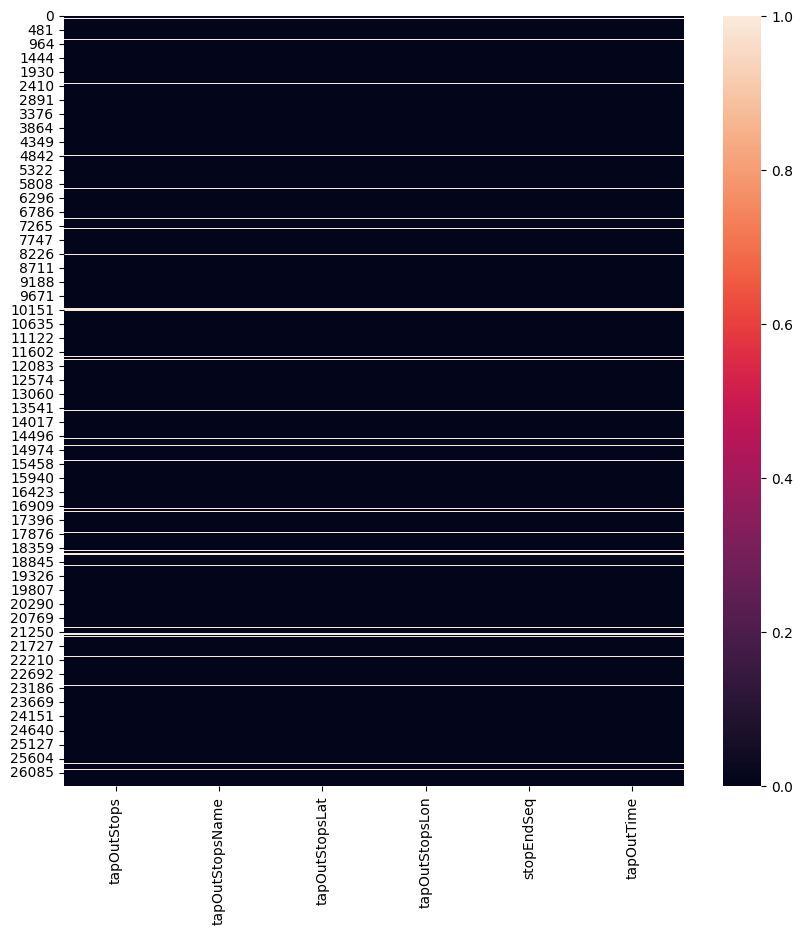

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime']].isna())

<Axes: >

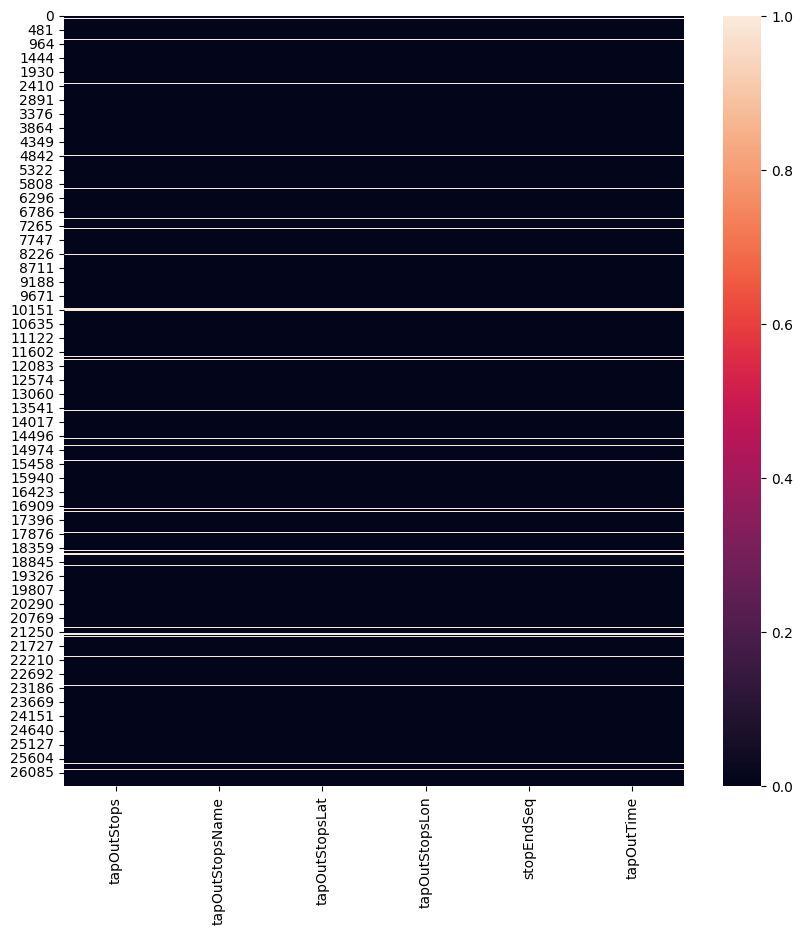

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime']].isna())

Berdasarkan heatmap diatas, *missing Value* pada semua kolom saling berkaitan per baris. Hal ini menunjukkan bahwa *missing value* tersebut tidak dapat diidentifikasi dan diprediksi dengan tepat. Oleh karena itu, diputuskan untuk menghapus semua *missing value* tersebut.

Drop sisa *Missing Value* pada kolom *tapInStops*

In [ ]:
df.dropna(subset=['tapOutStopsName'],inplace=True)

In [ ]:
df.isna().sum()

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorName         0
direction            0
tapInStops           0
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops          0
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
tapInOutStopsName    0
dtype: int64

Berdasarkan pengecekan, masih terdapat 19 *missing value* pada kolom `tapOutStops`. Kasus ini mirip dengan kasus pada kolom `tapInStops`, di mana kolom `tapOutStops` tidak terlalu digunakan karena dapat digantikan dengan kolom `tapOutStopsName`. Oleh karena itu, diputuskan untuk mengganti sisa *missing value* pada kolom `tapOutStops` dengan nilai "Other".

In [ ]:
df['tapOutStops'].replace(np.nan,'Other',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24773 entries, 0 to 26565
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transID            24773 non-null  object 
 1   payCardID          24773 non-null  int64  
 2   payCardBank        24773 non-null  object 
 3   payCardName        24773 non-null  object 
 4   payCardSex         24773 non-null  object 
 5   payCardBirthDate   24773 non-null  float64
 6   corridorID         24773 non-null  object 
 7   corridorName       24773 non-null  object 
 8   direction          24773 non-null  float64
 9   tapInStops         24773 non-null  object 
 10  tapInStopsName     24773 non-null  object 
 11  tapInStopsLat      24773 non-null  float64
 12  tapInStopsLon      24773 non-null  float64
 13  stopStartSeq       24773 non-null  float64
 14  tapInTime          24773 non-null  object 
 15  tapOutStops        24773 non-null  object 
 16  tapOutStopsName    24773 no

### **Conclusion**

Proses data cleaning menghasilkan 35.351 data bersih dari 37.900 data mentah. Pengurangan data sebesar 6,72% (2.549 baris) terjadi karena adanya anomali, *missing value*, dan pola yang tidak konsisten.

Proses Cleaning:
- Cleaning 1:
  *   Mengganti anomali di kolom `corridorName` dan `corridorID` dengan nilai yang serupa.
  *   Mengisi *missing Value* di kolom `corridorName` dan `corridorID` dengan pola dari kolom yang tidak memiliki *missing Value*.List item
- Cleaning 2:
  *   Mengisi *missing Value* di kolom payAmount dengan pola data dari kolom `corridorName`, `corridorID`, dan `payAmount` yang sudah ada.
  *   Tarif dibedakan berdasarkan jenis koridor:
      *   Luar kota ke dalam kota Jakarta: Rp 20.000
      *   Antar kota Jakarta: Rp 3.500
      *   Awal 'JAK' : Gratis (Rp 0)
- Cleaning 3:
  *   Mengisi *missing Value* di kolom `tapInStops` dengan pola data dari kolom `tapInStopsName` yang sudah ada.
  *   Sisa *missing Value* digantikan dengan 'Other' karena kolom `tapInStops` dapat digantikan dengan `tapInStopsName`.
-Cleaning 4:
  *   Mengisi *missing Value* di kolom `tapOutStops` dengan pola data dari kolom `tapOutStopsName` yang sudah ada.
  *   Sisa *missing Value* digantikan dengan 'Other' karena kolom `tapOutStops` dapat digantikan dengan `tapOutStopsName`.
- Cleaning 5:
  *   Baris yang mengandung *missing Value* di kolom `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` dihapus karena tidak ada informasi untuk pengisiannya.








## 3. Konversi Tipe Data:

Seperti yang telihat di dataset, ditemukan ketidaksesuaian pada tipe data kolom `tapInTime` dan `tapOutTime`. Kedua kolom tersebut memiliki tipe data `object`, sedangkan seharusnya bertipe data `datetime`.

Ketidaksesuaian tipe data ini dapat menyebabkan kesalahan dalam analisis data. Oleh karena itu, perlu dilakukan konversi tipe data `tapInTime` dan `tapOutTime` dari `object` menjadi `datetime` secara manual.

In [ ]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24773 entries, 0 to 26565
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transID            24773 non-null  object        
 1   payCardID          24773 non-null  int64         
 2   payCardBank        24773 non-null  object        
 3   payCardName        24773 non-null  object        
 4   payCardSex         24773 non-null  object        
 5   payCardBirthDate   24773 non-null  float64       
 6   corridorID         24773 non-null  object        
 7   corridorName       24773 non-null  object        
 8   direction          24773 non-null  float64       
 9   tapInStops         24773 non-null  object        
 10  tapInStopsName     24773 non-null  object        
 11  tapInStopsLat      24773 non-null  float64       
 12  tapInStopsLon      24773 non-null  float64       
 13  stopStartSeq       24773 non-null  float64       
 14  tapInTime  

## 4. Using `payAmount` to determine transportation type

In [ ]:
def typeConvert(x):
    if x == 3500 :
        return 'TransJakarta'
    elif x == 20000 :
        return 'RoyalTrans'
    elif x == 0 :
        return 'Jak Lingko'
    else :
        return x

df['transType']=df['payAmount'].apply(typeConvert)

In [ ]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInOutStopsName,transType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008.0,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Pal Putih - Tegalan,TransJakarta
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997.0,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Kemenkes 2 - Sampoerna Strategic,TransJakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992.0,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Gg. Kunir II - Simpang Kunir Kemukus,TransJakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978.0,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Taman Elok 1 - Raya Penggilingan,TransJakarta
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982.0,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Sunter Boulevard Barat - Kali Besar Barat,TransJakarta


## 5. Converting & Categorizing Age

In [ ]:
df['age']=2023-df['payCardBirthDate']

In [ ]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInOutStopsName,transType,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008.0,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Pal Putih - Tegalan,TransJakarta,15.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997.0,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Kemenkes 2 - Sampoerna Strategic,TransJakarta,26.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992.0,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Gg. Kunir II - Simpang Kunir Kemukus,TransJakarta,31.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978.0,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Taman Elok 1 - Raya Penggilingan,TransJakarta,45.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982.0,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Sunter Boulevard Barat - Kali Besar Barat,TransJakarta,41.0


Categorizing Age

In [ ]:
def ageCat(x):
    if 11 <= x <= 18 :
        return 'Student'
    elif x <= 40 :
        return 'Productive Employee'
    elif x <= 60 :
        return 'Senior Employee'
    else :
        return 'Elderly'

df['ageCategory']=df['age'].apply(ageCat)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInOutStopsName,transType,age,ageCategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008.0,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Pal Putih - Tegalan,TransJakarta,15.0,Student
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997.0,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Kemenkes 2 - Sampoerna Strategic,TransJakarta,26.0,Productive Employee
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992.0,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Gg. Kunir II - Simpang Kunir Kemukus,TransJakarta,31.0,Productive Employee
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978.0,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Taman Elok 1 - Raya Penggilingan,TransJakarta,45.0,Senior Employee
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982.0,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Sunter Boulevard Barat - Kali Besar Barat,TransJakarta,41.0,Senior Employee


Check

In [ ]:
df.query("ageCategory in ['Student', 'Productive Employee', 'Senior Employee', 'Retirement']")[['age', 'ageCategory']].value_counts().sort_index()

age   ageCategory        
11.0  Student                524
12.0  Student                459
13.0  Student                556
14.0  Student                453
15.0  Student                557
16.0  Student                472
17.0  Student                403
18.0  Student                507
19.0  Productive Employee    588
20.0  Productive Employee    655
21.0  Productive Employee    576
22.0  Productive Employee    360
23.0  Productive Employee    439
24.0  Productive Employee    330
25.0  Productive Employee    352
26.0  Productive Employee    552
27.0  Productive Employee    806
28.0  Productive Employee    441
29.0  Productive Employee    912
30.0  Productive Employee    652
31.0  Productive Employee    940
32.0  Productive Employee    801
33.0  Productive Employee    711
34.0  Productive Employee    834
35.0  Productive Employee    538
36.0  Productive Employee    888
37.0  Productive Employee    739
38.0  Productive Employee    775
39.0  Productive Employee    850
40.0  Productive 

## 6. Adding Duration Trip

Perhitungan durasi perjalanan dalam (menit) adalah pengurangan dari kolom `tapOutTime` dikurangi `tapInTime`

In [ ]:
df['durationTrip']=((df['tapOutTime']-df['tapInTime']).dt.total_seconds()/60).round(2)

Check unique

In [ ]:
df['durationTrip'].unique()

array([39.15, 57.28, 51.82, ..., 33.93, 43.6 , 33.08])

In [ ]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInOutStopsName,transType,age,ageCategory,durationTrip
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008.0,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Pal Putih - Tegalan,TransJakarta,15.0,Student,39.15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997.0,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Kemenkes 2 - Sampoerna Strategic,TransJakarta,26.0,Productive Employee,57.28
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992.0,R1A,Pantai Maju - Kota,0.0,B00499P,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Gg. Kunir II - Simpang Kunir Kemukus,TransJakarta,31.0,Productive Employee,51.82
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978.0,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Taman Elok 1 - Raya Penggilingan,TransJakarta,45.0,Senior Employee,43.42
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982.0,12,Tanjung Priok - Pluit,0.0,P00239,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Sunter Boulevard Barat - Kali Besar Barat,TransJakarta,41.0,Senior Employee,39.47


## **Distribution Data Check**

Statistika deskriptif kolom data objek setelah proses data cleaning

In [ ]:
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName,tapInOutStopsName,transType,ageCategory
count,24773,24773,24773,24773,24773,24773,24773,24773,24773,24773,24773,24773,24773
unique,24773,6,798,2,210,210,1153,1153,1077,1076,1503,3,4
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN,Rusun Kapuk Muara - Penjaringan,TransJakarta,Productive Employee
freq,1,12302,67,12990,302,302,169,169,232,232,99,12590,14479


Statistika deskriptif kolom data numerik setelah proses data cleaning

In [ ]:
df.describe(exclude='object')

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,durationTrip
count,2.477300e+04,24773.000000,24773.000000,24773.000000,24773.000000,24773.000000,24773,24773.000000,24773.000000,24773.000000,24773,24773.000000,24773.000000,24773.000000
mean,4.425656e+17,1990.145844,0.499374,-6.215171,106.840914,13.469301,2023-04-13 23:06:07.373067008,-6.214778,106.840478,21.106810,2023-04-14 00:16:35.115205888,2685.383280,32.854156,70.462384
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-03 05:00:14,-6.391068,106.614730,1.000000,2023-04-03 05:26:52,0.000000,11.000000,20.000000
25%,1.800573e+14,1982.000000,0.000000,-6.245863,106.802860,4.000000,2023-04-07 06:20:38,-6.247708,106.801180,11.000000,2023-04-07 07:09:00,0.000000,23.000000,49.620000
50%,3.512095e+15,1990.000000,0.000000,-6.214998,106.834270,11.000000,2023-04-13 07:44:11,-6.214979,106.833380,18.000000,2023-04-13 08:55:26,3500.000000,33.000000,69.220000
75%,4.704902e+15,2000.000000,1.000000,-6.176162,106.882140,19.000000,2023-04-19 09:30:52,-6.175292,106.882160,29.000000,2023-04-19 10:47:19,3500.000000,41.000000,94.120000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,65.000000,2023-04-28 17:59:33,-6.091746,107.023660,73.000000,2023-04-28 19:55:22,20000.000000,77.000000,120.000000
std,1.349034e+18,12.913727,0.500010,0.057632,0.060113,11.984024,NaN,0.058744,0.060763,13.589171,NaN,4140.975966,12.913727,27.824751


Memvisualisasi distribusi data dengan boxplot

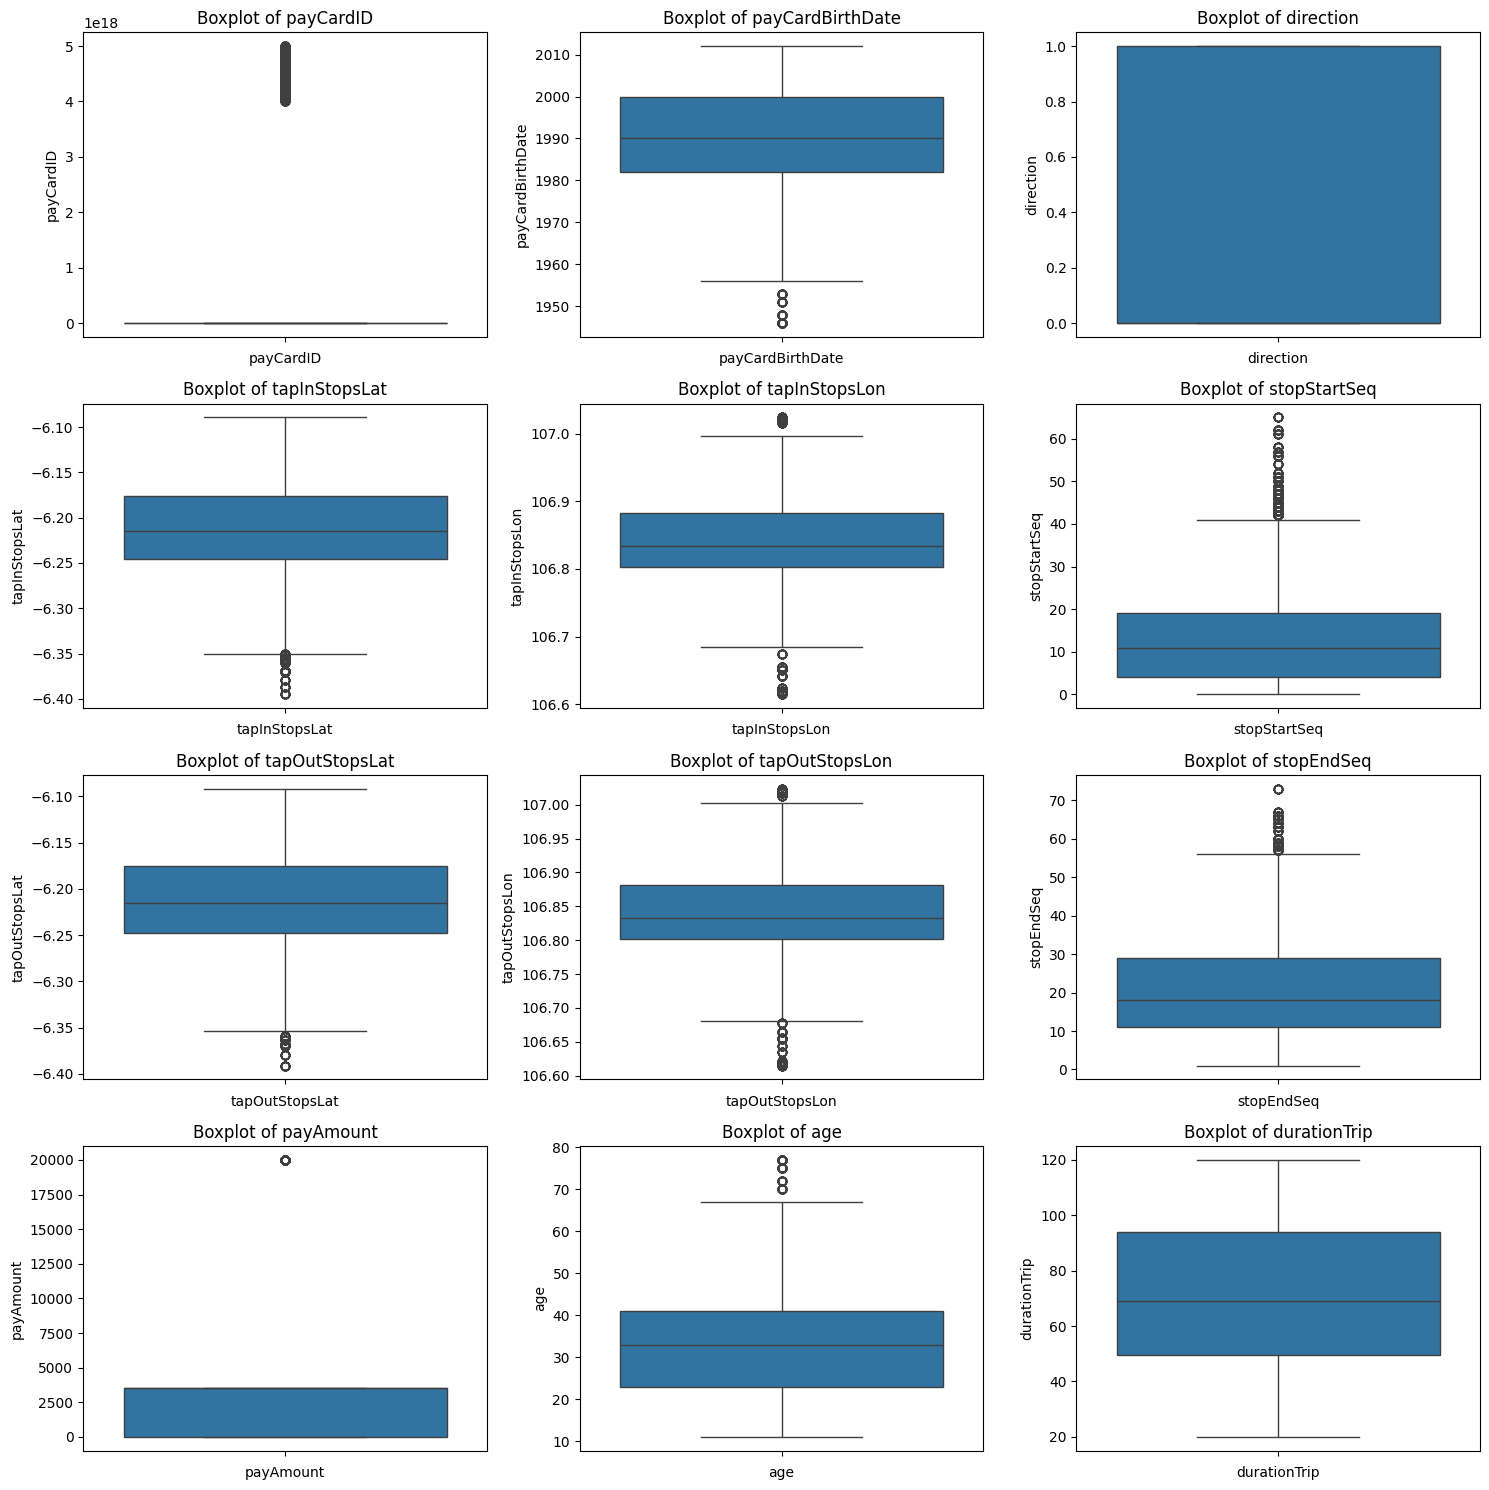

In [ ]:
colNum = df[['payCardID', 'payCardBirthDate','direction','tapInStopsLat', 'tapInStopsLon', 'stopStartSeq',
        'tapOutStopsLat','tapOutStopsLon','stopEndSeq','payAmount', 'age', 'durationTrip']]

plt.figure(figsize=(15, 15))
for i, column in enumerate(colNum, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Berdasarkan grafik Boxplot diatas, dapat disimpulkan:
- Data tidak terdistribusi normal
  *   Terdapat outlier pada semua kolom, kecuali kolom direction.
  *   Hal ini disebabkan oleh skala pengukuran data yang kategorikal (nominal dan ordinal), kecuali kolom durationTrip dengan satuan menit yang memiliki skala pengukuran interval (data dapat diukur).

Untuk memastikan lebih lanjut, dilakukan uji normalitas di tiap kolomnya.

Memastikan distribusi data dengan test normalitas

In [ ]:
from scipy.stats import kstest, norm
list_result = []
for i in colNum:
    ks_statistic, pvalue = kstest(df[i], 'norm', args=(df[i].mean(), df[i].std()))

    if pvalue > 0.05:
        list_result.append([i, round(pvalue, 3), 'normal'])
    else:
        list_result.append([i, round(pvalue, 3), 'not normal'])

pd.DataFrame(list_result, columns=['Column Name', 'PVal', 'Distribution Type'])

,Column Name,PVal,Distribution Type
0,payCardID,0.0,not normal
1,payCardBirthDate,0.0,not normal
2,direction,0.0,not normal
3,tapInStopsLat,0.0,not normal
4,tapInStopsLon,0.0,not normal
5,stopStartSeq,0.0,not normal
6,tapOutStopsLat,0.0,not normal
7,tapOutStopsLon,0.0,not normal
8,stopEndSeq,0.0,not normal
9,payAmount,0.0,not normal


Oleh karena banyaknya data (ukuran sampel besar), uji Kolmogorov-Smirnov digunakan.  Hasil uji ini menunjukkan bahwa semua kolom numerik ditolak H0 nya (p-value < 0.05), yang berarti data tersebut tidak terdistribusi normal.  Hal ini bisa jadi disebabkan oleh keberadaan data kategorikal yang tercampur dengan data numerik pada kolom-kolom tersebut.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24773 entries, 0 to 26565
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transID            24773 non-null  object        
 1   payCardID          24773 non-null  int64         
 2   payCardBank        24773 non-null  object        
 3   payCardName        24773 non-null  object        
 4   payCardSex         24773 non-null  object        
 5   payCardBirthDate   24773 non-null  float64       
 6   corridorID         24773 non-null  object        
 7   corridorName       24773 non-null  object        
 8   direction          24773 non-null  float64       
 9   tapInStops         24773 non-null  object        
 10  tapInStopsName     24773 non-null  object        
 11  tapInStopsLat      24773 non-null  float64       
 12  tapInStopsLon      24773 non-null  float64       
 13  stopStartSeq       24773 non-null  float64       
 14  tapInTime  

# **Data Analayze**

Untuk meningkatkan konsistensi PT. Transjakarta dalam mengatasi kemacetan dan meningkatkan fasilitas halte-halte busway, saya fokuskan pada beberapa permasalahan utama, yaitu:
1. Halte mana yang sibuk
2. Halte mana yang banyak dikunjungi penumpang wanita
3. Halte mana yang banyak dikunjungi penumpang lansia

## Halte Tersibuk

Untuk melihat koridor busway tersibuk, bisa dilihat dengan

1. Persentase penggunaan angkutan umum PT. TransJakarta
2. Rute Transportasi Umum PT. TransJakarta terbanyak
3. Halte Transportasi Umum PT. TransJakarta dengan banyaknya penumpang naik & turun
4. Pengguna Transportasi Umum PT. TransJakarta Dihari Senin sampai Minggu
5. Pengguna Transportasi Umum PT. TransJakarta Dalam Per Harinya
6. Pengguna Koridor Transportasi Umum PT. TransJakarta Terbanyak di Jam Puncak
7. Pengguna Halte Transportasi Umum PT. TransJakarta Dijam Puncak

### 1. Persentase Penggunaan Angkutan Umum PT. TransJakarta

Pertama, kami akan tampilkan proporsi jenis transportasi umum PT. TransJakarta yang digunakan pada bulan April 2023

Text(0.5, 1.0, 'Persentase Layanan PT. TransJakarta')

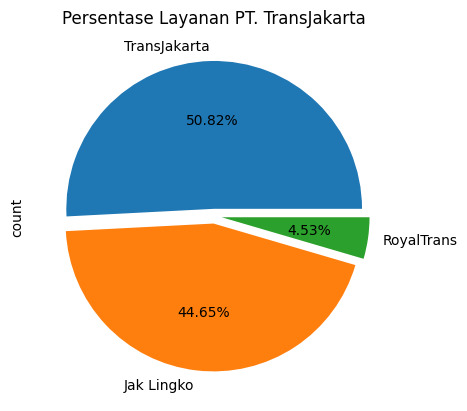

In [ ]:
df['transType'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=(0.05,0.05,0.05))
plt.title('Persentase Layanan PT. TransJakarta')
plt.title('Persentase Layanan PT. TransJakarta')

Kesimpulan yang bisa diambil dari grafik diatas adalah:
- Transjakarta adalah pilihan utama (50,33%), diikuti Jak Lingko (45,02%) dan RoyalTrans (4,65%).
- Jak Lingko gratis, Transjakarta terjangkau (Rp 3.500), dan RoyalTrans lebih mahal (Rp 20.000).
- Masyarakat lebih memilih opsi yang ekonomis dan efektif.


### 2. Rute Paling Banyak Gunakan

Langkah selanjutnya adalah menganalisis data koridor angkutan umum PT. Transjakarta yang paling banyak digunakan, berdasarkan jenis angkutannya.

Menggabungkan kolom `transType` dengan `corridorName`, dan `transType` menjadi fokus pengelompokkan

In [ ]:
df.groupby('transType')['corridorName'].value_counts()

transType     corridorName                               
Jak Lingko    Kampung Rambutan - Pondok Gede                 327
              Rusun Pondok Bambu - Walikota Jakarta Timur    323
              Rusun Rawa Bebek - Kodamar                     307
              Kampung Rambutan - Pasar Rebo via Poncol       292
              Kampung Melayu - Pondok Kelapa                 280
                                                            ... 
TransJakarta  St. LRT Pegangsaan Dua - JIS                   52 
              Pondok Kelapa - BKN                            47 
              Gondangdia - Balai Kota                        39 
              Senen - Tanah Abang                            38 
              Kampung Rambutan - Blok M                      16 
Name: count, Length: 216, dtype: int64

Data diatas adalah jumlah penumpang berdasarkan type angkutan PT. Transjakarta dengan rute/koridornya.
Selanjutnya saya visualisasikan grafiknya dengan menampilkan 5 rute dengan penumpang terbanyak disetiap jenis angkutannya.

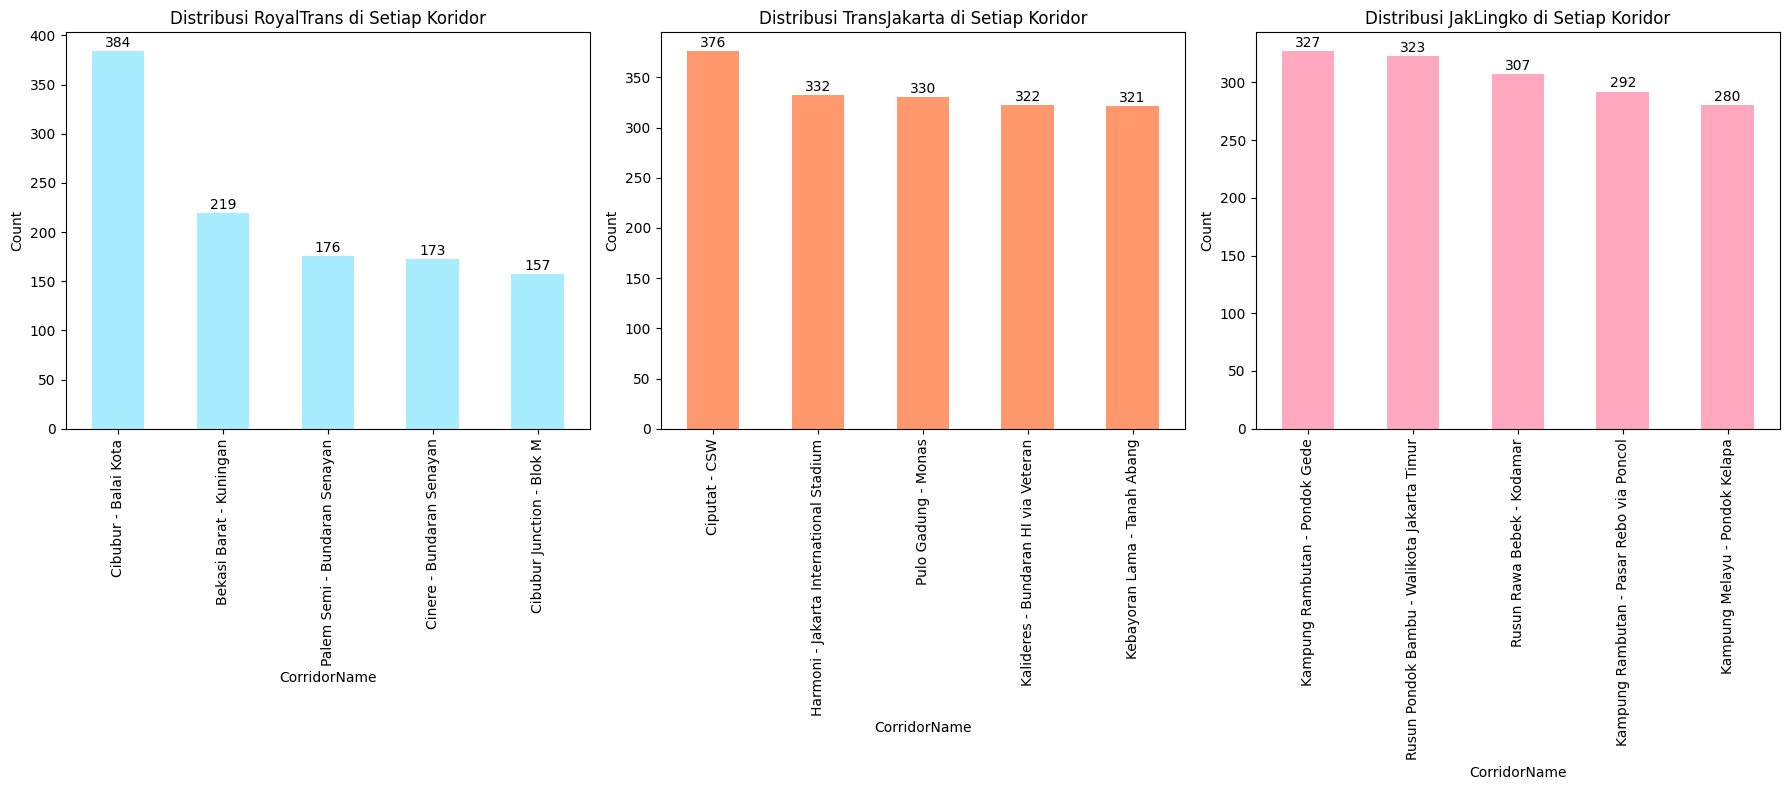

In [ ]:
RTVC = df[df['transType'] == 'RoyalTrans']['corridorName'].value_counts().head(5)
dfVC = df[df['transType'] == 'TransJakarta']['corridorName'].value_counts().head(5)
JLVC = df[df['transType'] == 'Jak Lingko']['corridorName'].value_counts().head(5)

plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
ax = RTVC.plot(kind='bar', color='#a8edff')
plt.title('Distribusi RoyalTrans di Setiap Koridor')
plt.xlabel('CorridorName')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
ax2 = dfVC.plot(kind='bar', color='#ff986d')
plt.title('Distribusi TransJakarta di Setiap Koridor')
plt.xlabel('CorridorName')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
ax3 = JLVC.plot(kind='bar', color='#ffa8bf')
plt.title('Distribusi JakLingko di Setiap Koridor')
plt.xlabel('CorridorName')
plt.ylabel('Count')

for i, v in enumerate(RTVC):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

for i, v in enumerate(dfVC):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom')

for i, v in enumerate(JLVC):
    ax3.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

Dari grafik diatas, dapat diketahui halte tersibuk dari masing masing jenis transportasi
- RoyalTrans:
  *   Cibubur - Balai Kota (384 penumpang)
  *   Bekasi Barat - Kuningan (219 penumpang)
  *   Palem Semi - Bundaran Senayan (176 penumpang)
- Transjakarta
  *   Ciputat - CSW (376 penumpang)
  *   Harmoni - Jakarta International Stadium (332 penumpang)
  *   Pulo Gadung - Monas (330 penumpang)
- Jak Lingo
  *   Kampung Rambutan - Pondok Gede (327 penumpang)
  *   Rusun Pondok Bambu - Walikota Jakarta Timur (327 penumpang)
  *   Rusun Rawa Bebek - Kodamardengan (307 penumpang)

Dengan pola penggunaan:
- RoyalTrans: Digunakan oleh masyarakat yang tinggal di kota penunjang Jakarta (Bogor, Bekasi, Tangerang) dan berkegiatan di Jakarta.
- TransJakarta: Digunakan oleh masyarakat yang memiliki tujuan lintas Jakarta (misalnya Jakarta Timur ke Jakarta Pusat).
- Jak Lingko: Digunakan oleh masyarakat yang berkegiatan di sekitar kota/kecamatan setempat.

Kesimpulan:
Data menunjukkan bahwa angkutan umum di Jabodetabek melayani berbagai kebutuhan masyarakat dengan pola penggunaan yang berbeda-beda.

### 3. Halte Dengan Banyaknya Penumpang Naik & Turun

Langkah berikutnya adalah meneliti koridor angkutan umum PT. Transjakarta yang paling banyak digunakan, berdasarkan jumlah penumpang naik

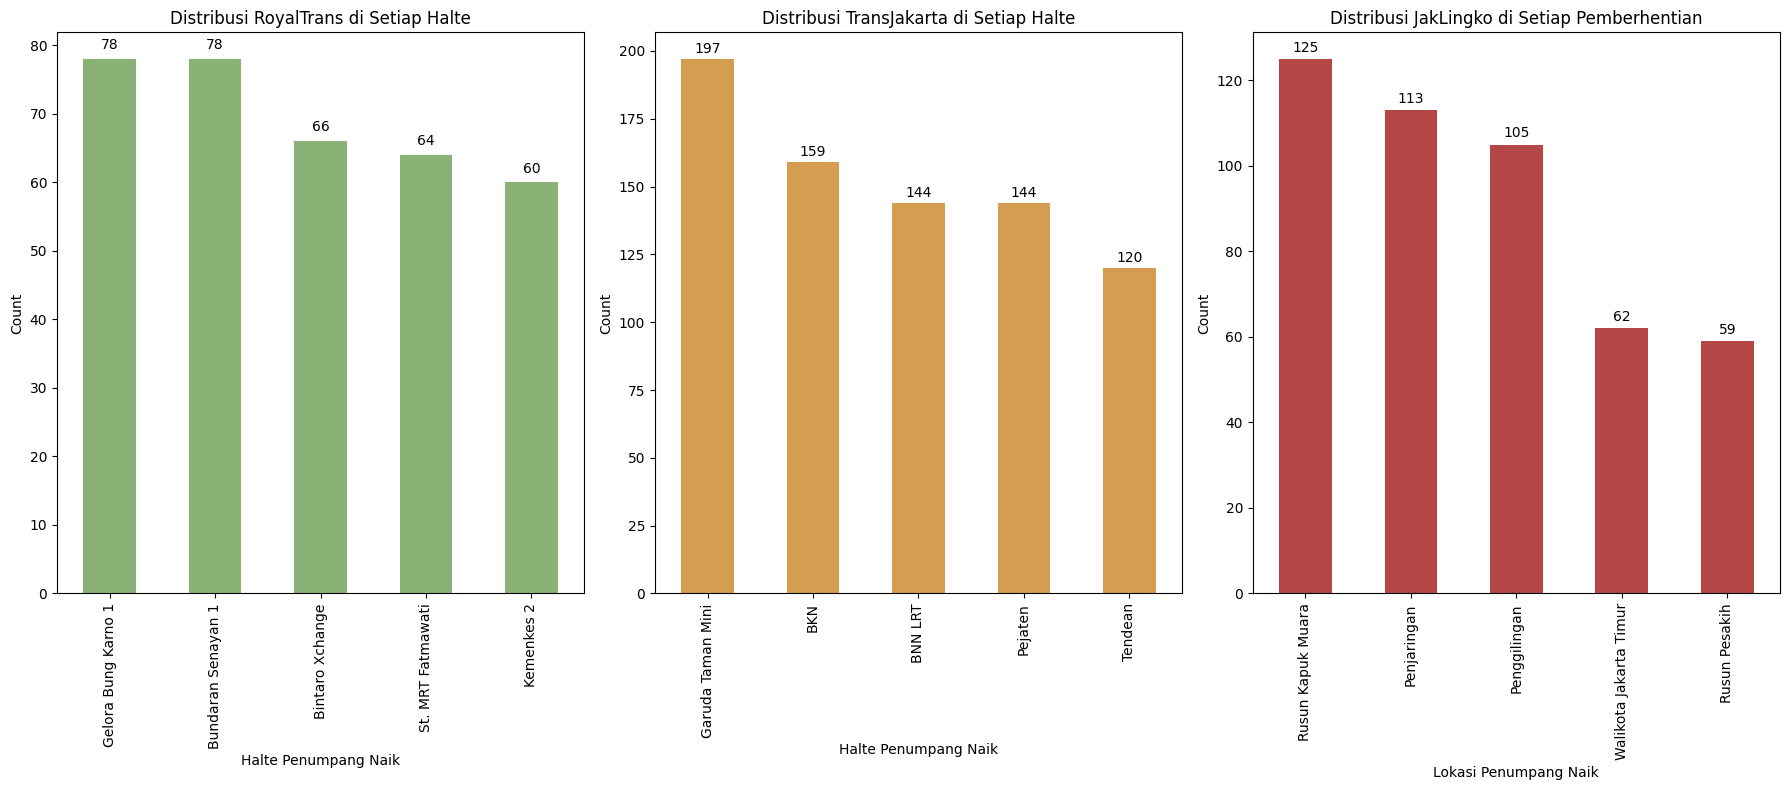

In [ ]:
RTVC = df[df['transType'] == 'RoyalTrans']['tapInStopsName'].value_counts().head(5)
dfVC = df[df['transType'] == 'TransJakarta']['tapInStopsName'].value_counts().head(5)
JLVC = df[df['transType'] == 'Jak Lingko']['tapInStopsName'].value_counts().head(5)

plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
ax = RTVC.plot(kind='bar', color='#8ab176')
plt.title('Distribusi RoyalTrans di Setiap Halte')
plt.xlabel('Halte Penumpang Naik')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
ax2 = dfVC.plot(kind='bar', color='#d59d50')
plt.title('Distribusi TransJakarta di Setiap Halte')
plt.xlabel('Halte Penumpang Naik')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
ax3 = JLVC.plot(kind='bar', color='#b54646')
plt.title('Distribusi JakLingko di Setiap Pemberhentian')
plt.xlabel('Lokasi Penumpang Naik')
plt.ylabel('Count')

for i, v in enumerate(RTVC):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

for i, v in enumerate(dfVC):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom')

for i, v in enumerate(JLVC):
    ax3.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

Langkah selanjutnya: Menganalisis grafik penumpang turun untuk mendapatkan pemahaman lebih lengkap.



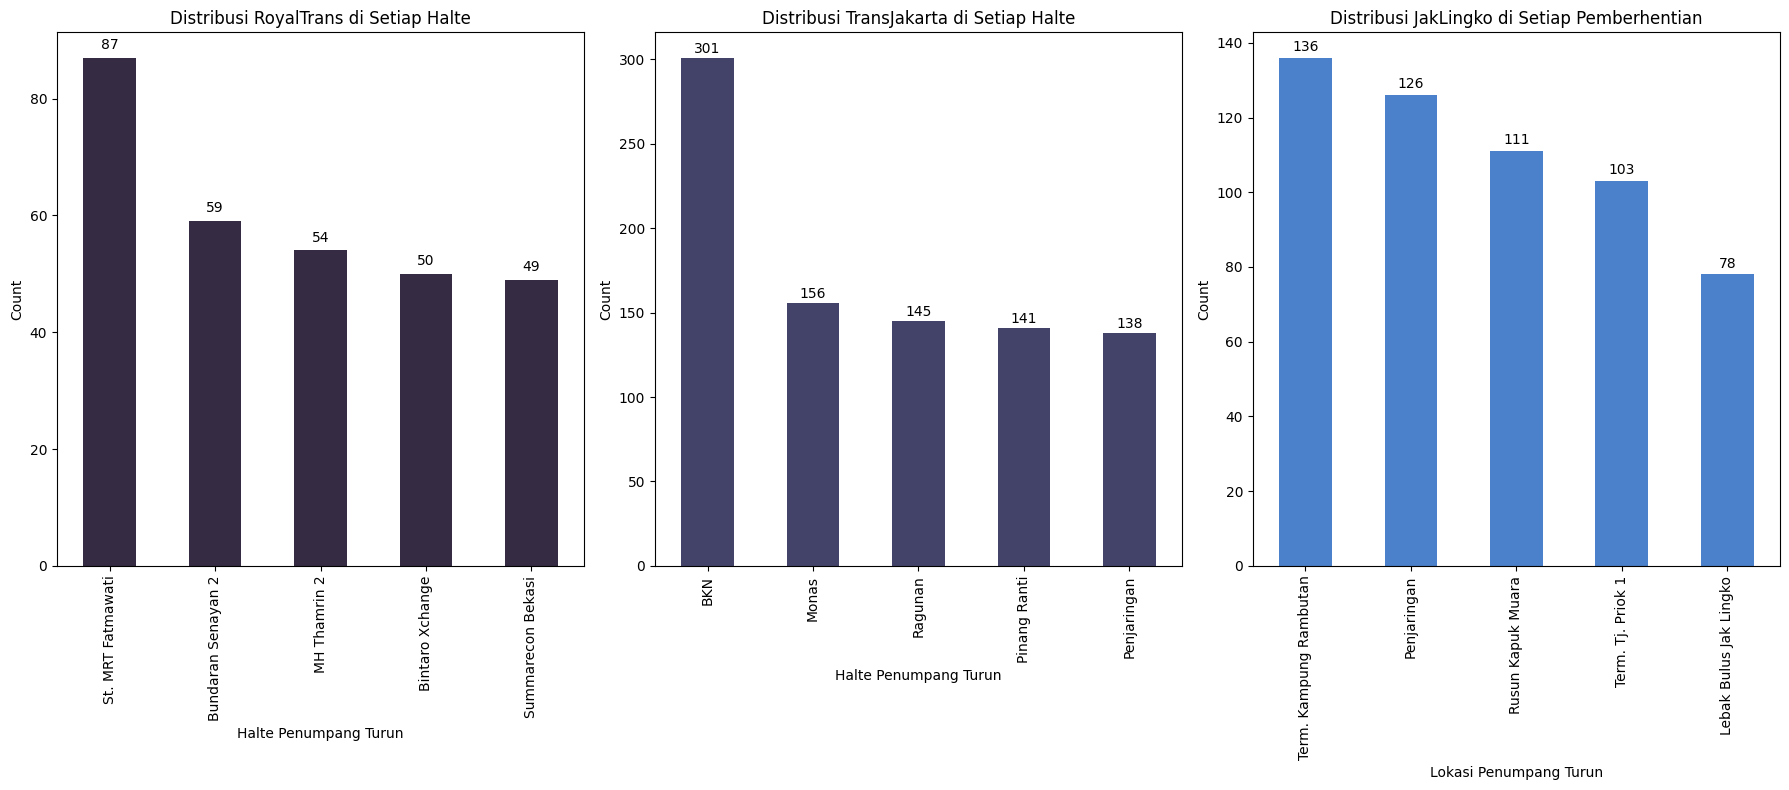

In [ ]:
RTVC = df[df['transType'] == 'RoyalTrans']['tapOutStopsName'].value_counts().head(5)
dfVC = df[df['transType'] == 'TransJakarta']['tapOutStopsName'].value_counts().head(5)
JLVC = df[df['transType'] == 'Jak Lingko']['tapOutStopsName'].value_counts().head(5)

plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
ax = RTVC.plot(kind='bar', color='#352b42')
plt.title('Distribusi RoyalTrans di Setiap Halte')
plt.xlabel('Halte Penumpang Turun')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
ax2 = dfVC.plot(kind='bar', color='#43436a')
plt.title('Distribusi TransJakarta di Setiap Halte')
plt.xlabel('Halte Penumpang Turun')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
ax3 = JLVC.plot(kind='bar', color='#4b80ca')
plt.title('Distribusi JakLingko di Setiap Pemberhentian')
plt.xlabel('Lokasi Penumpang Turun')
plt.ylabel('Count')

for i, v in enumerate(RTVC):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

for i, v in enumerate(dfVC):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom')

for i, v in enumerate(JLVC):
    ax3.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

Berdasarkan analisis data grafik penumpang naik dan turun, dapat disimpulkan beberapa pola mobilitas pengguna angkutan umum:
- RoyalTrans:
    - Pengguna didominasi oleh mereka yang tinggal di Jakarta Selatan dan Bintaro.
    - Angkutan ini digunakan untuk mobilitas di dalam dan luar Jakarta.
    - Halte Bintaro Xchange dan Summarecon Bekasi menjadi titik penting bagi pengguna RoyalTrans yang tinggal di luar Jakarta.
- TransJakarta:
    - Pengguna didominasi oleh mereka yang tinggal dan bekerja di Jakarta.
    - Angkutan ini digunakan untuk mobilitas antar wilayah di Jakarta.
    - Halte di Jakarta Pusat, Selatan, dan Timur menjadi titik penting bagi pengguna TransJakarta.
- Jak Lingko:
    - Pengguna didominasi oleh mereka yang tinggal dan beraktivitas di Jakarta Utara dan Timur.
    - Angkutan ini digunakan untuk mobilitas lokal di wilayah tersebut.
    - Halte di Jakarta Utara dan Timur menjadi titik penting bagi pengguna Jak Lingko.
    - Ada kemungkinan pengguna Jak Lingko yang turun di Lebak Bulus melanjutkan perjalanan ke terminal atau memang bertempat tinggal di sana.

### 4. Penggunaan Transportasi Umum PT. TransJakarta Dihari Senin sampai Minggu

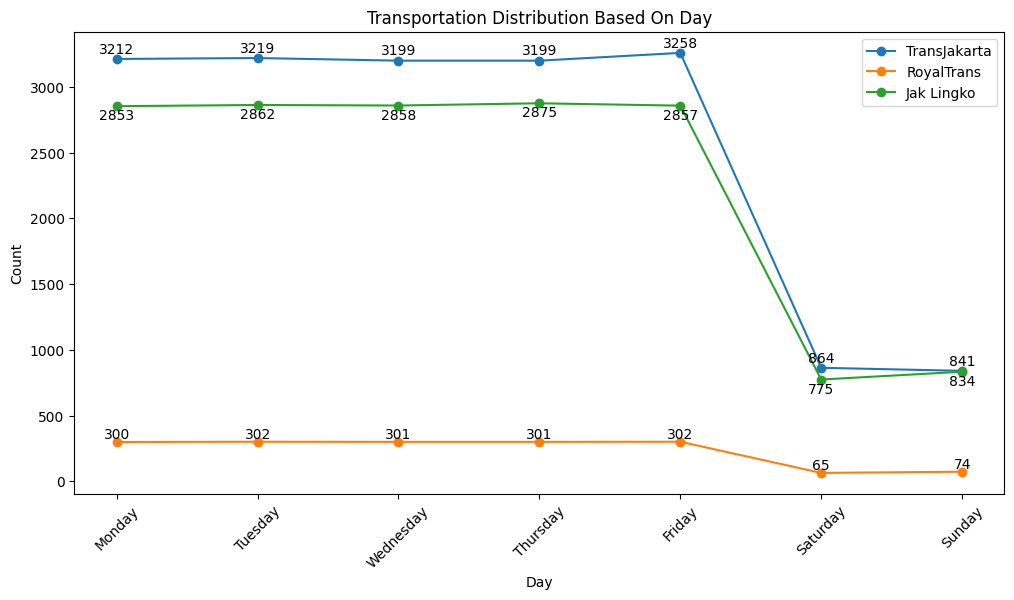

In [ ]:
df['nama_hari'] = df['tapInTime'].dt.strftime('%A')

count_transjakarta = df[df['transType'] == 'TransJakarta']['nama_hari'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
count_royaltrans = df[df['transType'] == 'RoyalTrans']['nama_hari'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
count_jaklingko = df[df['transType'] == 'Jak Lingko']['nama_hari'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(12, 6))
plt.plot(count_transjakarta.index, count_transjakarta.values, label='TransJakarta', marker='o', linestyle='-')
plt.plot(count_royaltrans.index, count_royaltrans.values, label='RoyalTrans', marker='o', linestyle='-')
plt.plot(count_jaklingko.index, count_jaklingko.values, label='Jak Lingko', marker='o', linestyle='-')

plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Transportation Distribution Based On Day')
plt.xticks(rotation=45)
plt.legend()

for x, y in zip(count_transjakarta.index, count_transjakarta.values):
    plt.text(x, y+20, str(y), ha='center', va='bottom')
for x, y in zip(count_royaltrans.index, count_royaltrans.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
for x, y in zip(count_jaklingko.index, count_jaklingko.values):
    plt.text(x, y-20, str(y), ha='center', va='top')

plt.show()

Berdasarkan grafik, dapat terlihat pola kesibukan pengguna angkutan umum yang berbeda-beda:

- TransJakarta:
  - Hari sibuk: Senin - Jumat
  - Puncak tersibuk: Jumat
  - Penurunan drastis: Sabtu & Minggu

- Jak Lingko:
  - Hari sibuk: Senin - Jumat
  - Puncak tersibuk: Kamis
  - Penurunan: Sabtu & Minggu

- RoyalTrans:
  - Hari sibuk: Senin - Jumat
  - Puncak tersibuk: Selasa & Jumat
  - Penurunan: Sabtu & Minggu

Dengan kesimpulan:
- Pengguna TransJakarta dan Jak Lingko banyak menggunakan angkutan umum di hari kerja (weekday).
- TransJakarta mengalami puncak kesibukan di hari Jumat, sedangkan Jak Lingko di hari Kamis.
- RoyalTrans memiliki dua puncak kesibukan di hari Selasa dan Jumat.
- Pola ini menunjukkan bahwa angkutan umum banyak digunakan untuk aktivitas kerja dan sekolah.

### 5. Penggunaan Transportasi Umum PT. TransJakarta Per Harinya

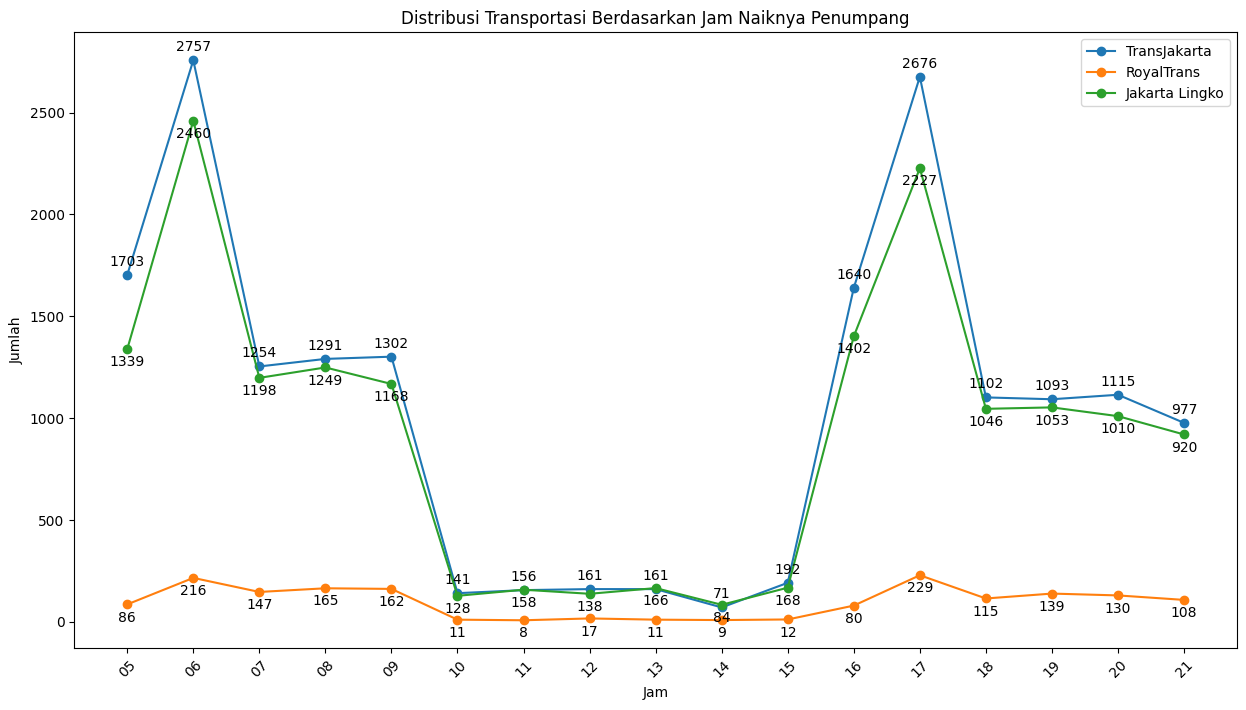

In [ ]:
df['TimeIn'] = df['tapInTime'].dt.strftime('%H')

count_transjakarta = df[df['transType'] == 'TransJakarta']['TimeIn'].value_counts().sort_index()
count_royaltrans = df[df['transType'] == 'RoyalTrans']['TimeIn'].value_counts().sort_index()
count_jaklingko = df[df['transType'] == 'Jak Lingko']['TimeIn'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
plt.plot(count_transjakarta.index, count_transjakarta.values, label='TransJakarta', marker='o', linestyle='-')
plt.plot(count_royaltrans.index, count_royaltrans.values, label='RoyalTrans', marker='o', linestyle='-')
plt.plot(count_jaklingko.index, count_jaklingko.values, label='Jakarta Lingko', marker='o', linestyle='-')

plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Distribusi Transportasi Berdasarkan Jam Naiknya Penumpang')
plt.xticks(rotation=45)
plt.legend()

for x, y in zip(count_transjakarta.index, count_transjakarta.values):
    plt.text(x, y+30, str(y), ha='center', va='bottom')
for x, y in zip(count_royaltrans.index, count_royaltrans.values):
    plt.text(x, y-30, str(y), ha='center', va='top')
for x, y in zip(count_jaklingko.index, count_jaklingko.values):
    plt.text(x, y-30, str(y), ha='center', va='top')

plt.show()

Berdasarkan grafik, terlihat pola kenaikan penumpang yang serupa pada TransJakarta, Jak Lingko, dan RoyalTrans:

Pagi hari:
- Puncak pertama: 6 pagi (mungkin karena jam masuk sekolah)
- Penurunan: 7 pagi
- Kenaikan konstan: 7-9 pagi (mungkin karena jam masuk kerja)
- Penurunan drastis: 10 pagi

Sore hari:
- Kenaikan tajam: 4 sore (mungkin karena jam pulang sekolah)
- Puncak kedua: 5 sore (mungkin karena jam pulang kerja)
- Penurunan: 6-9 malam (mungkin karena pekerja lembur)

Kesimpulan:

- Pola ini menunjukkan dua puncak penumpang, yaitu di pagi hari (sekolah & kerja) dan sore hari (pulang sekolah & kerja).
- Jam sibuk angkutan umum dipengaruhi oleh jam masuk dan pulang sekolah/kerja.

Namun, perlu dianalisis lebih lanjut data penumpang turun untuk memvalidasi kesimpulan ini.

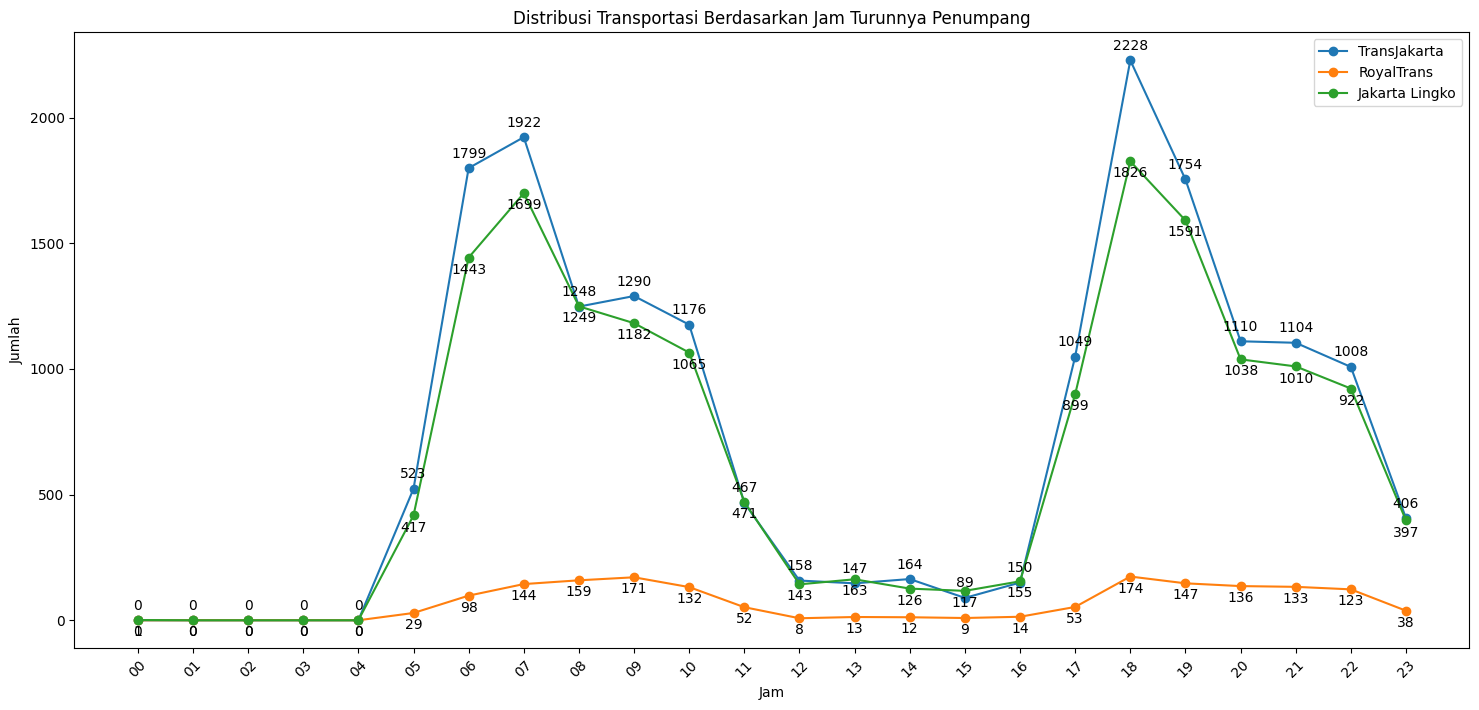

In [ ]:
df['TimeOut'] = df['tapOutTime'].dt.strftime('%H')

all_hours = [f"{i:02d}" for i in range(24)]

count_transjakarta = df[df['transType'] == 'TransJakarta']['TimeOut'].value_counts().reindex(all_hours, fill_value=0)
count_royaltrans = df[df['transType'] == 'RoyalTrans']['TimeOut'].value_counts().reindex(all_hours, fill_value=0)
count_jaklingko = df[df['transType'] == 'Jak Lingko']['TimeOut'].value_counts().reindex(all_hours, fill_value=0)

plt.figure(figsize=(18, 8))
plt.plot(count_transjakarta.index, count_transjakarta.values, label='TransJakarta', marker='o', linestyle='-')
plt.plot(count_royaltrans.index, count_royaltrans.values, label='RoyalTrans', marker='o', linestyle='-')
plt.plot(count_jaklingko.index, count_jaklingko.values, label='Jakarta Lingko', marker='o', linestyle='-')

plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Distribusi Transportasi Berdasarkan Jam Turunnya Penumpang')
plt.xticks(rotation=45)
plt.legend()

for x, y in zip(count_transjakarta.index, count_transjakarta.values):
    plt.text(x, y+30, str(y), ha='center', va='bottom')
for x, y in zip(count_royaltrans.index, count_royaltrans.values):
    plt.text(x, y-20, str(y), ha='center', va='top')
for x, y in zip(count_jaklingko.index, count_jaklingko.values):
    plt.text(x, y-20, str(y), ha='center', va='top')

plt.show()

Berdasarkan grafik, terlihat pergeseran jam penurunan penumpang dibandingkan jam kenaikannya:

Pagi hari:
- Puncak naik: 6 pagi
- Puncak turun: 7 pagi (bergeser 1 jam)

Sore hari:
- Puncak naik: 5 sore
- Puncak turun: 6 sore (bergeser 1 jam)

Bisa diartikan bahwa jam tersibuk bergeser kurang lebih 1 jam setelah jam penumpang naik.

In [ ]:
df[df['tapOutTime'].dt.hour < 1][['TimeIn','TimeOut','tapInTime','tapOutTime']]

,TimeIn,TimeOut,tapInTime,tapOutTime
37615,21,00,2023-04-24 21:46:56,2023-04-25 00:30:08


Data diatas adalah data anomali yang memiliki jam naik dan turun penumpang berbeda sendiri, tetapi karena skala pengukurannya kategorikal Nominal, kemungkinan benar atau tidak nya data tersbut tidak bisa dibuktikan. Jadi data tersebut dibiarkan apa adanya.

### 6. Pengguna Koridor Transportasi Umum PT. TransJakarta Terbanyak di Jam Puncak

Pengguna Koridor Transportasi Umum PT. TransJakarta Terbanyak di Jam Puncak Saat Naiknya Penumpang

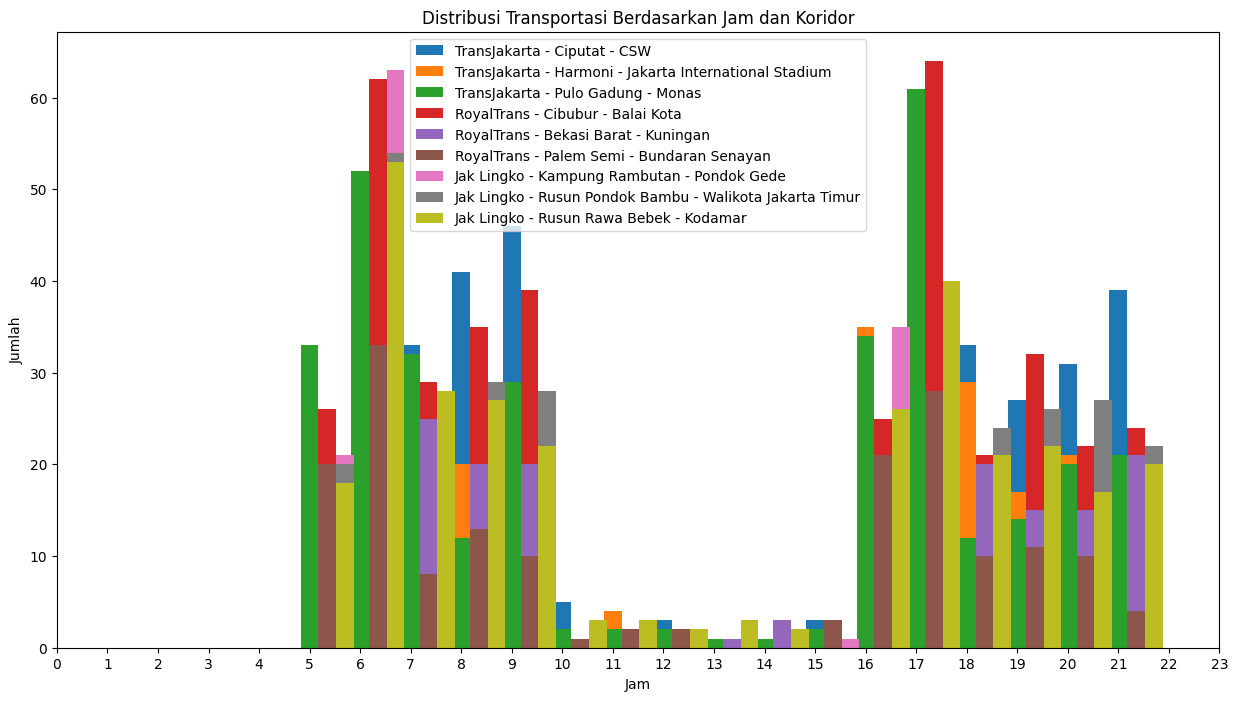

In [ ]:
trans_types = ['TransJakarta', 'RoyalTrans', 'Jak Lingko']
top_stops = {}
for t_type in trans_types:
    top_stops[t_type] = df[df['transType'] == t_type]['corridorName'].value_counts().head(3).index.tolist()

filtered_df = df[df.apply(lambda x: x['corridorName'] in top_stops[x['transType']], axis=1)]

grouped_df = filtered_df.groupby(['transType', 'corridorName', 'TimeIn']).size().reset_index(name='counts')

plt.figure(figsize=(15, 8))
width = 0.35

for i, t_type in enumerate(trans_types):
    for stop in top_stops[t_type]:
        subset_df = grouped_df[(grouped_df['transType'] == t_type) & (grouped_df['corridorName'] == stop)]
        plt.bar(subset_df['TimeIn'].astype(int) + i * width, subset_df['counts'], width, label=f"{t_type} - {stop}")

plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Distribusi Transportasi Berdasarkan Jam dan Koridor')
plt.xticks(range(24))
plt.legend()
plt.show()

Berdasarkan grafik, dapat diketahui 3 koridor terfavorit di jam sibuk Transportasi Umum PT. Transjakarta saat penumpang naik:

Pagi hari (6-10 pagi) & Sore hari (4-10 malam):
- Transjakarta:
  - Koridor 5: Pulo Gadung - Monas
  - Koridor 8: Ciputat - CSW
  - Koridor 2: Harmoni - Jakarta International Stadium

- RoyalTrans:
  - Koridor 10: Cibubur - Balai Kota
  - Koridor 13: Palem Semi - Bundaran Senayan
  - Koridor 9: Bekasi Barat - Kuningan
- Jak Lingko:
  - Koridor 1: Rawa Bebek - Kodamar
  - Koridor 2: Rusun Pondok Bambu - Walikota Jakarta Timur
  - Koridor 3: Kampung Rambutan - Pondok Gede

  Jika di lihat dengan seksama, TransJakarta menjadi digunakan paling banyak di jam puncak saat naiknya penumpang, dilanjutkan Jak Lingko dan terakhir ada RoyalTrans.

Pengguna Koridor Transportasi Umum PT. TransJakarta Terbanyak di Jam Puncak Saat Turunnya Penumpang

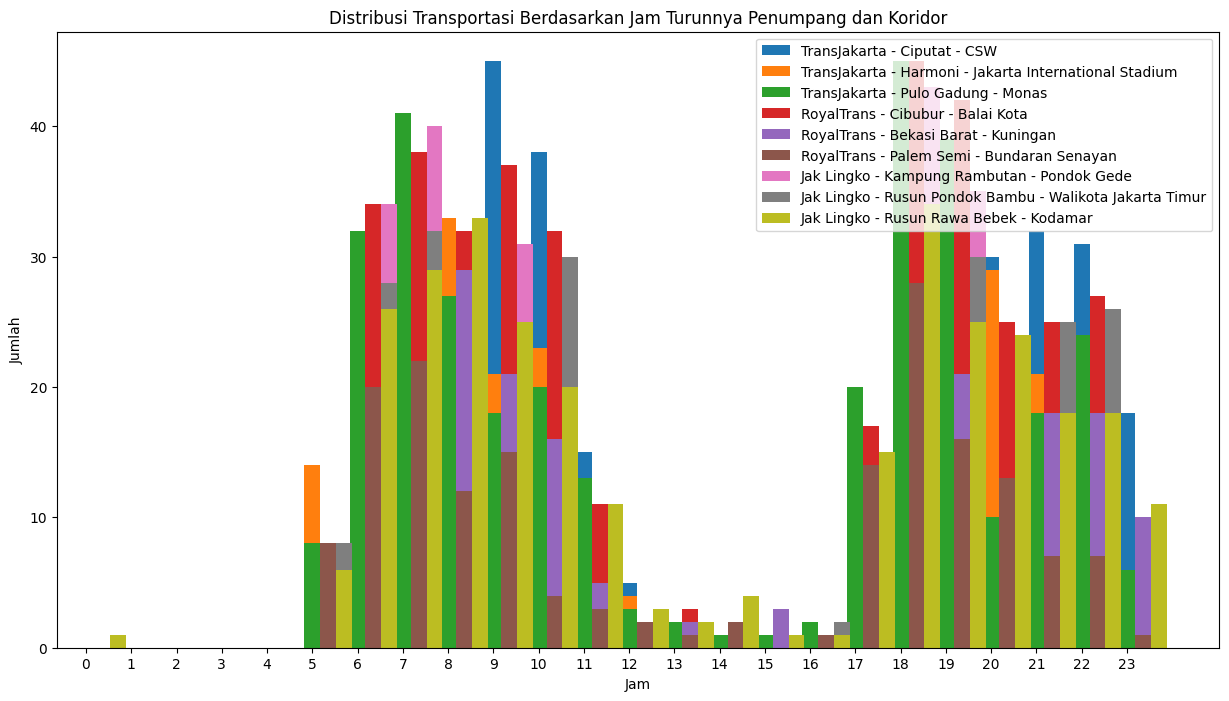

In [ ]:
trans_types = ['TransJakarta', 'RoyalTrans', 'Jak Lingko']
top_stops = {}
for t_type in trans_types:
    top_stops[t_type] = df[df['transType'] == t_type]['corridorName'].value_counts().head(3).index.tolist()

filtered_df = df[df.apply(lambda x: x['corridorName'] in top_stops[x['transType']], axis=1)]

grouped_df = filtered_df.groupby(['transType', 'corridorName', 'TimeOut']).size().reset_index(name='counts')

plt.figure(figsize=(15, 8))
width = 0.35

for i, t_type in enumerate(trans_types):
    for stop in top_stops[t_type]:
        subset_df = grouped_df[(grouped_df['transType'] == t_type) & (grouped_df['corridorName'] == stop)]
        plt.bar(subset_df['TimeOut'].astype(int) + i * width, subset_df['counts'], width, label=f"{t_type} - {stop}")

plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Distribusi Transportasi Berdasarkan Jam Turunnya Penumpang dan Koridor')
plt.xticks(range(24))
plt.legend()
plt.show()

Analisis grafik menunjukkan pola yang serupa pada 3 koridor terfavorit saat jam puncak turunnya penumpang:

- Transjakarta:
  - Koridor 5: Pulo Gadung - Monas
  - Koridor 8: Ciputat - CSW
  - Koridor 2: Harmoni - Jakarta International Stadium

- RoyalTrans:
  - Koridor 10: Cibubur - Balai Kota
  - Koridor 13: Palem Semi - Bundaran Senayan
  - Koridor 9: Bekasi Barat - Kuningan

- Jak Lingko:
  - Koridor 1: Rawa Bebek - Kodamar
  - Koridor 2: Rusun Pondok Bambu - Walikota Jakarta Timur
  - Koridor 3: Kampung Rambutan - Pondok Gede]

  Jika di lihat dengan seksama, TransJakarta masih menjadi digunakan paling banyak di jam puncak saat naiknya penumpang, dilanjutkan Jak Lingko dan terakhir ada RoyalTrans.

### 7. Pengguna Halte atau Lokasi Transportasi Umum PT. TransJakarta Terbanyak di Jam Puncak

Pengguna Halte atau Lokasi Transportasi Umum PT. TransJakarta Terbanyak di Jam Puncak Saat Naiknya Penumpang

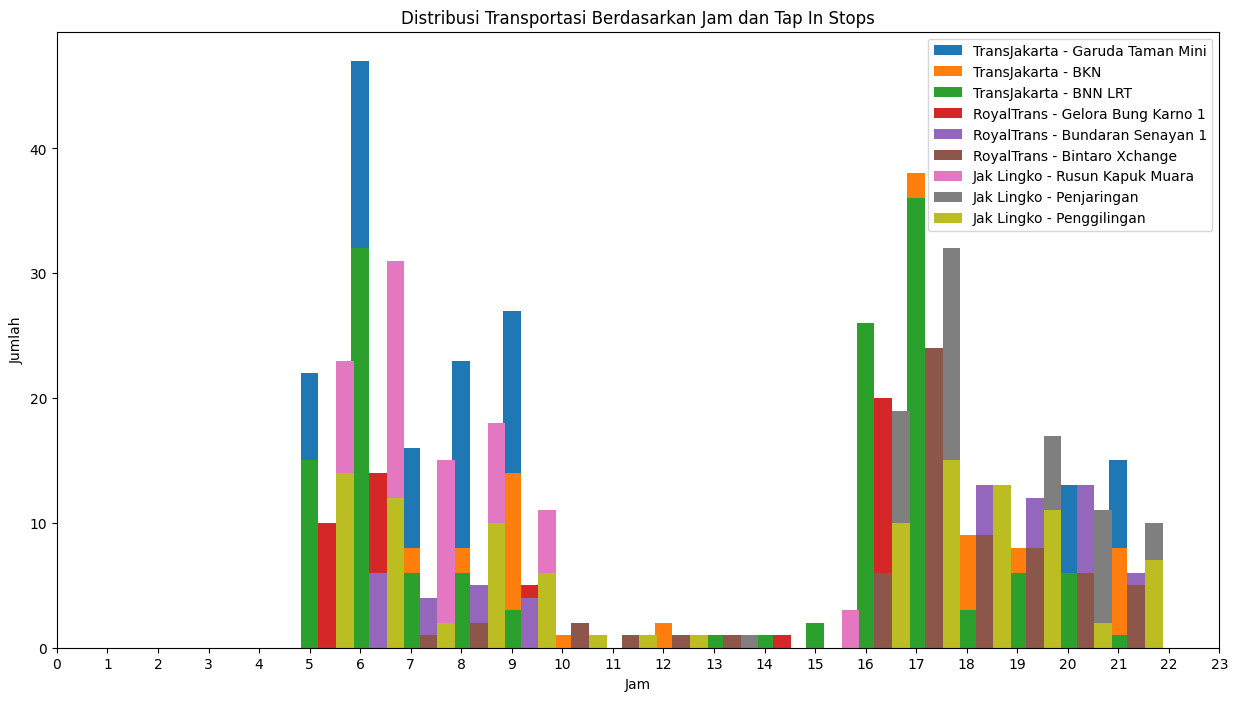

In [ ]:
trans_types = ['TransJakarta', 'RoyalTrans', 'Jak Lingko']
top_stops = {}
for t_type in trans_types:
    top_stops[t_type] = df[df['transType'] == t_type]['tapInStopsName'].value_counts().head(3).index.tolist()

filtered_df = df[df.apply(lambda x: x['tapInStopsName'] in top_stops[x['transType']], axis=1)]

grouped_df = filtered_df.groupby(['transType', 'tapInStopsName', 'TimeIn']).size().reset_index(name='counts')

plt.figure(figsize=(15, 8))
width = 0.35

for i, t_type in enumerate(trans_types):
    for stop in top_stops[t_type]:
        subset_df = grouped_df[(grouped_df['transType'] == t_type) & (grouped_df['tapInStopsName'] == stop)]
        plt.bar(subset_df['TimeIn'].astype(int) + i * width, subset_df['counts'], width, label=f"{t_type} - {stop}")

plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Distribusi Transportasi Berdasarkan Jam dan Tap In Stops')
plt.xticks(range(24))
plt.legend()
plt.show()

Berdasarkan grafik, berikut 3 halte terfavorit di jam sibuk Transportasi Umum PT. Transjakarta saat penumpang naik:

Pagi hari (6-10 pagi) & Sore hari (4-10 malam):

  - Transjakarta:
    - Halte BNN LRT
    - Halte Garuda Taman Mini
    - Halte BKN

  - RoyalTrans:
    - Halte Bintaro Xchange
    - Halte Gelora Bung Karno 1
    - Halte Bundaran Senayan 1
  - Jak Lingko:
    - Halte Penggilingan
    - Halte Rusun Kapuk Muara
    - Halte
  
Jika di lihat dengan seksama, TransJakarta menjadi yang paling banyak digunakan di jam puncak saat naiknya penumpang, dilanjutkan Jak Lingko dan terakhir ada RoyalTrans.

Pengguna Halte atau Lokasi Transportasi Umum PT. TransJakarta Terbanyak di Jam Puncak Saat Turunnya Penumpang

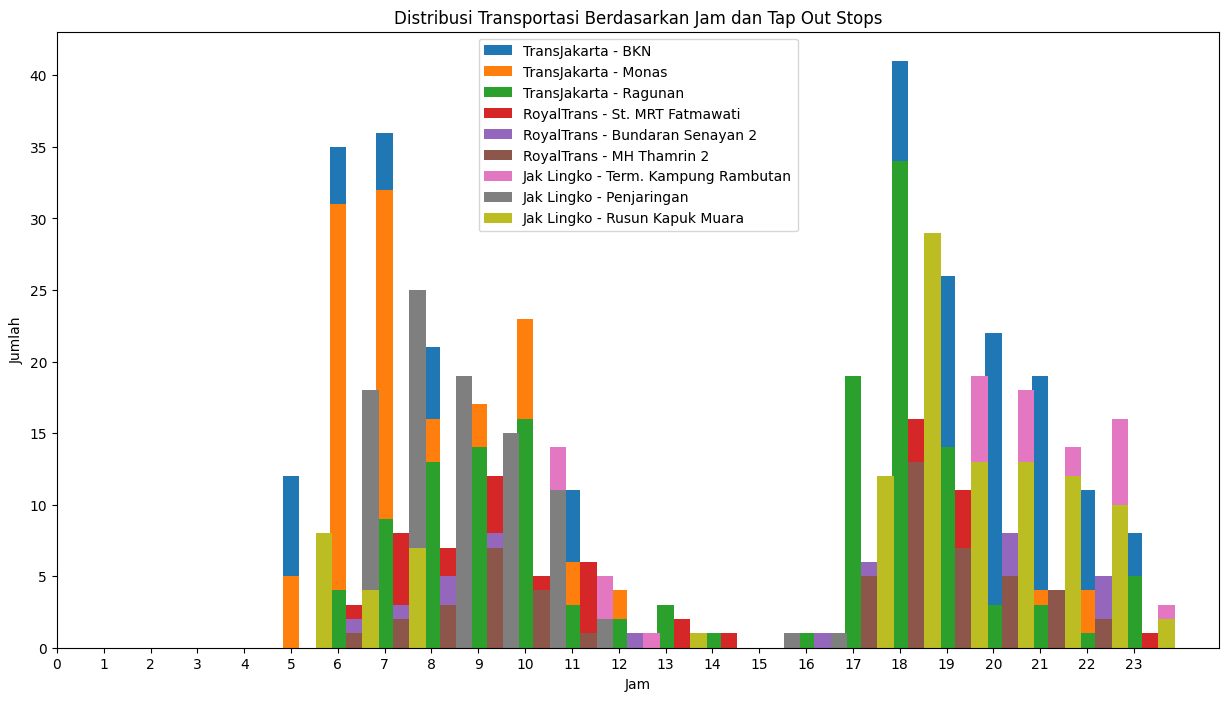

In [ ]:
trans_types = ['TransJakarta', 'RoyalTrans', 'Jak Lingko']
top_stops = {}
for t_type in trans_types:
    top_stops[t_type] = df[df['transType'] == t_type]['tapOutStopsName'].value_counts().head(3).index.tolist()

filtered_df = df[df.apply(lambda x: x['tapOutStopsName'] in top_stops[x['transType']], axis=1)]

grouped_df = filtered_df.groupby(['transType', 'tapOutStopsName', 'TimeOut']).size().reset_index(name='counts')

plt.figure(figsize=(15, 8))
width = 0.35

for i, t_type in enumerate(trans_types):
    for stop in top_stops[t_type]:
        subset_df = grouped_df[(grouped_df['transType'] == t_type) & (grouped_df['tapOutStopsName'] == stop)]
        plt.bar(subset_df['TimeOut'].astype(int) + i * width, subset_df['counts'], width, label=f"{t_type} - {stop}")




plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Distribusi Transportasi Berdasarkan Jam dan Tap Out Stops')
plt.xticks(range(24))
plt.legend()
plt.show()

Berdasarkan grafik, berikut 3 halte terfavorit saat turun di jam sibuk Transportasi Umum PT. Transjakarta:

Pagi hari (6-10 pagi) & Sore hari (4-10 malam):
  - Transjakarta:
    - Halte Ragunan
    - Halte BKN
    - Halte Monas
  - RoyalTrans:
    - Halte MH Thamrin 2
    - Halte St. MRT Fatmawati
    - Halte Bundaran Senayan 2
  - Jak Lingko:
    - Halte Rusun Kapuk Muara
    - Halte Penjaringan
    - Halte Terminal Kampung Rambutan

Jika di lihat dengan seksama, TransJakarta menjadi yang paling banyak digunakan di jam puncak saat naiknya penumpang, dilanjutkan Jak Lingko dan terakhir ada RoyalTrans.

## Halte Yang Paling Banyak Dikunjungi Wanita

Dua indikator dapat digunakan untuk melihat halte yang paling banyak digunakan oleh wanita:

1. Persentase Pengguna Wanita:
  - Data ini menunjukkan persentase penumpang wanita di setiap halte.
  - Halte dengan persentase tinggi menunjukkan banyaknya wanita yang menggunakan halte tersebut.
2. Jumlah Penumpang Wanita Naik dan Turun:
  - Data ini menunjukkan jumlah penumpang wanita yang naik dan turun di setiap halte.
  - Halte dengan jumlah tinggi menunjukkan banyaknya wanita yang menggunakan halte tersebut sebagai titik awal, tujuan, atau transit.

### 1. Persentase pengguna wanita dalam menggunakan angkutan umum PT. Transjakarta

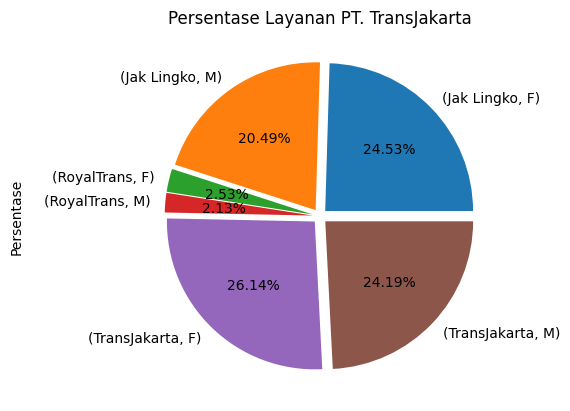

In [ ]:
grouped = df.groupby(['transType', 'payCardSex']).size()

explode = (0.05,) * len(grouped)
grouped.plot(kind='pie', autopct='%.2f%%', explode=explode)

plt.title('Persentase Layanan PT. TransJakarta')
plt.ylabel('Persentase', labelpad=80)
plt.show()

Berdasarkan grafik yang ditampilkan, terlihat bahwa jumlah pengguna wanita lebih banyak dibandingkan pengguna laki-laki. Hal ini menunjukkan bahwa wanita lebih memilih menggunakan transportasi umum dibandingkan laki-laki.

### 2. Halte Transportasi Umum PT. TransJakarta dengan banyaknya penumpang wanita naik dan turun

Halte Transportasi Umum PT. TransJakarta dengan banyaknya penumpang wanita naik

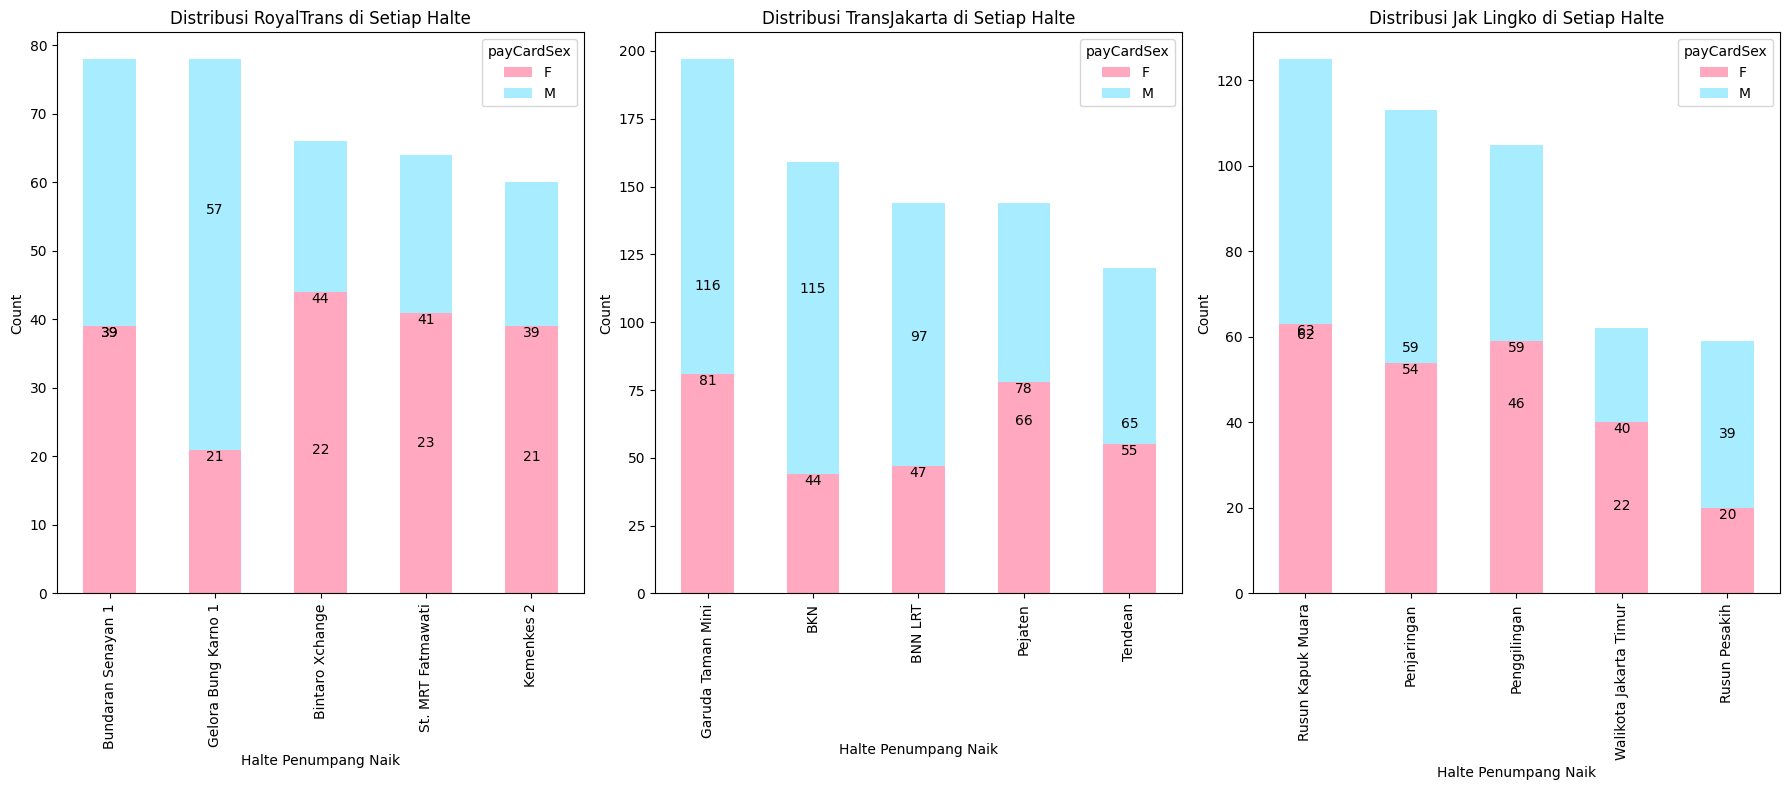

In [ ]:
def make_subplot(transType, color, position):
    plt.subplot(1, 3, position)
    pivot = df[df['transType'] == transType].pivot_table(index='tapInStopsName', columns='payCardSex', aggfunc='size', fill_value=0)

    top_stops_names = pivot.sum(axis=1).nlargest(5).index
    top_stops = pivot.loc[top_stops_names]

    ax = top_stops.plot(kind='bar', stacked=True, color=['#ffa8bf', '#a8edff'], ax=plt.gca())
    plt.title(f'Distribusi {transType} di Setiap Halte')
    plt.xlabel('Halte Penumpang Naik')
    plt.ylabel('Count')

    for idx, rect in enumerate(ax.patches):
        height = rect.get_height()
        width = rect.get_x() + rect.get_width() / 2.
        label = int(height)
        ax.text(width, height, label, ha='center', va='top')

plt.figure(figsize=(18, 8))
make_subplot('RoyalTrans', 'purple', 1)
make_subplot('TransJakarta', 'blue', 2)
make_subplot('Jak Lingko', 'green', 3)
plt.tight_layout()
plt.show()

Halte Transportasi Umum PT. TransJakarta dengan banyaknya penumpang turun

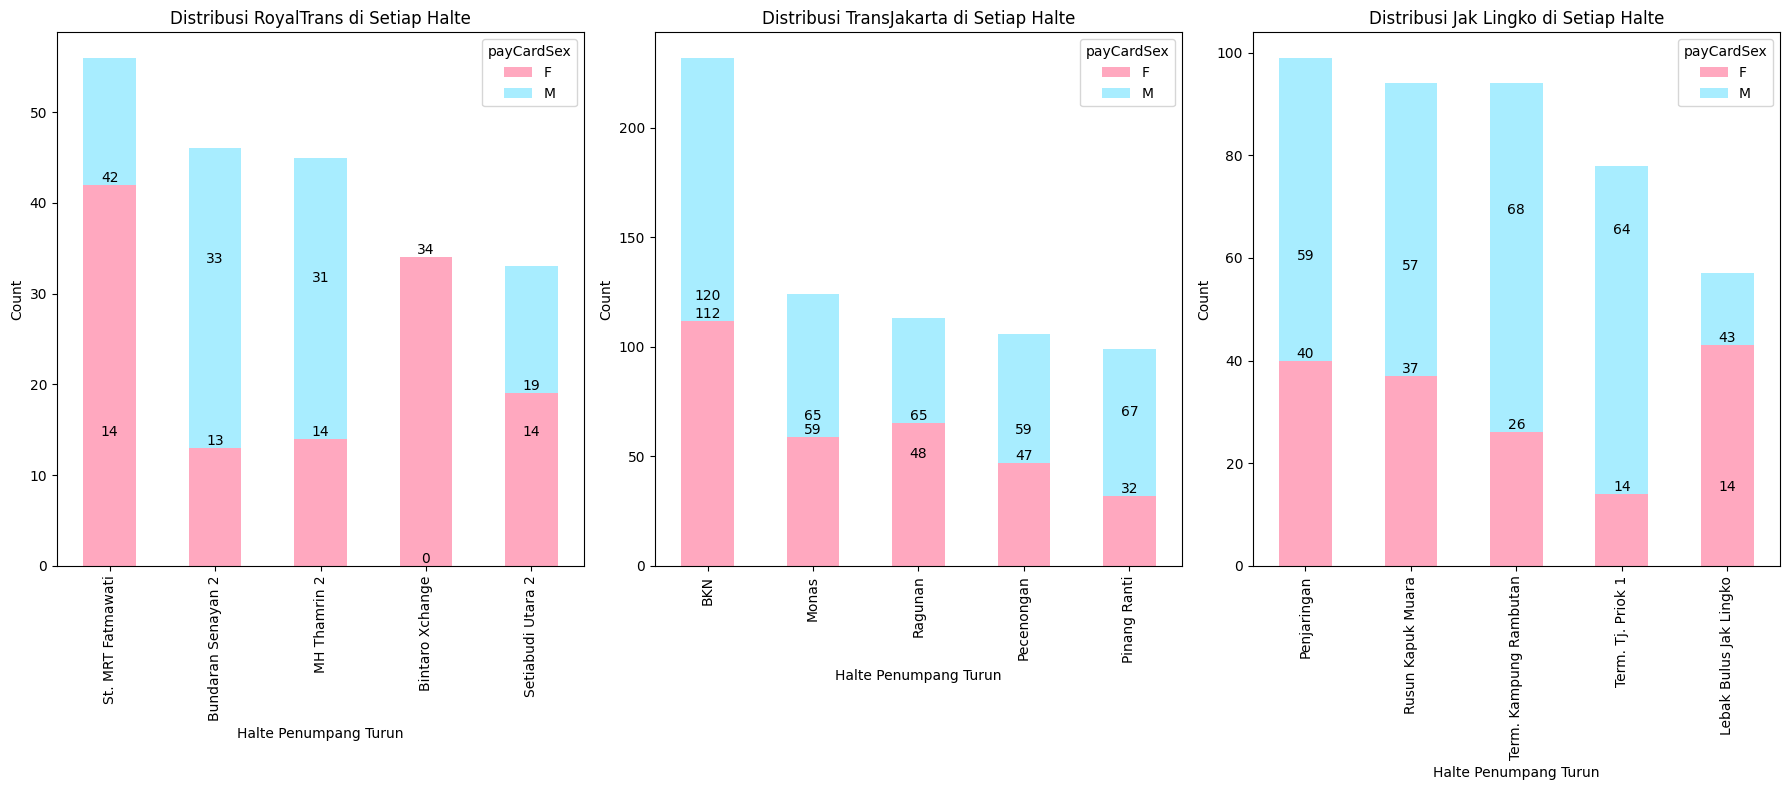

In [ ]:
def make_subplot(transType, color, position):
    plt.subplot(1, 3, position)
    pivot = df[df['transType'] == transType].pivot_table(index='tapOutStopsName', columns='payCardSex', aggfunc='size', fill_value=0)

    top_stops_names = pivot.sum(axis=1).nlargest(5).index
    top_stops = pivot.loc[top_stops_names]

    ax = top_stops.plot(kind='bar', stacked=True, color=['#ffa8bf', '#a8edff'], ax=plt.gca())
    plt.title(f'Distribusi {transType} di Setiap Halte')
    plt.xlabel('Halte Penumpang Turun')
    plt.ylabel('Count')

    for idx, rect in enumerate(ax.patches):
        height = rect.get_height()
        width = rect.get_x() + rect.get_width() / 2.
        label = int(height)
        ax.text(width, height, label, ha='center', va='bottom')

plt.figure(figsize=(18, 8))
make_subplot('RoyalTrans', 'purple', 1)
make_subplot('TransJakarta', 'blue', 2)
make_subplot('Jak Lingko', 'green', 3)
plt.tight_layout()
plt.show()


## Halte Yang Paling Banyak Dikunjungi Lansia

Dua indikator dapat digunakan untuk melihat halte busway yang paling banyak digunakan oleh lansia:

1. Persentase Pengguna Lansia:
  - Data ini menunjukkan persentase penumpang lansia di setiap halte.
  - Halte dengan persentase tinggi menunjukkan banyaknya lansia yang menggunakan halte tersebut.
2. Jumlah Penumpang Lansia Naik dan Turun:
  - Data ini menunjukkan jumlah penumpang lansia yang naik dan turun di setiap halte.
  - Halte dengan jumlah tinggi menunjukkan banyaknya lansia yang menggunakan halte tersebut sebagai titik awal, tujuan, atau transit.

### 1. Persentase pengguna lansia dalam menggunakan angkutan umum PT. Transjakarta

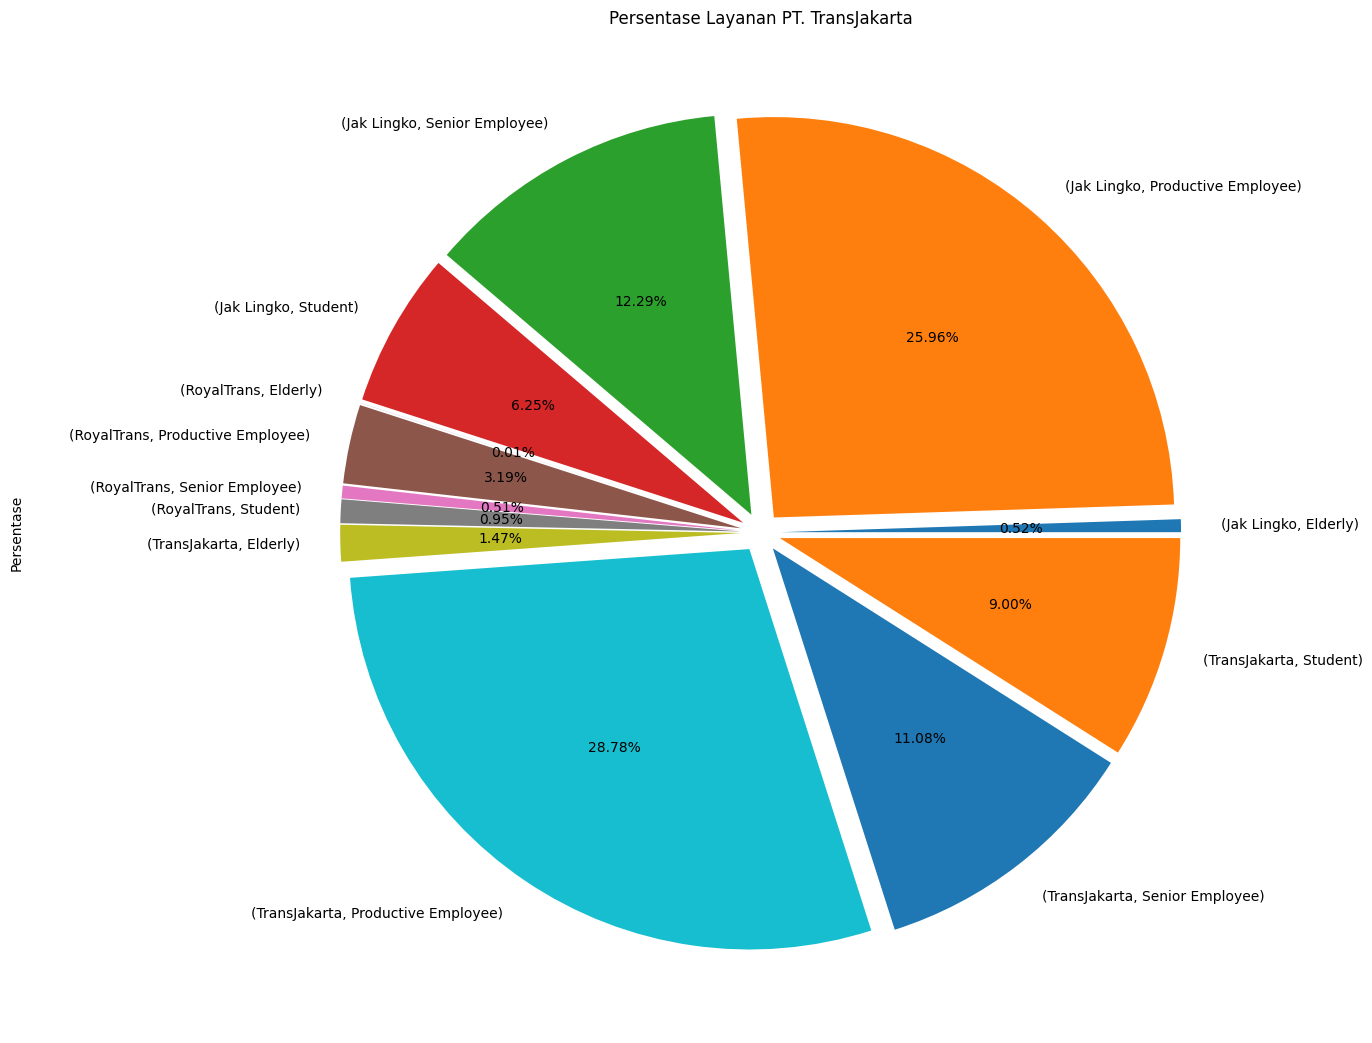

In [ ]:
plt.figure(figsize=(13,13))

grouped = df.groupby(['transType', 'ageCategory']).size()

explode = (0.05,) * len(grouped)
grouped.plot(kind='pie', autopct='%.2f%%', explode=explode)

plt.title('Persentase Layanan PT. TransJakarta')
plt.ylabel('Persentase', labelpad=170)
plt.show()

Berdasarkan grafik, terlihat bahwa persentase penumpang lansia di Transportasi Umum PT. Transjakarta masih tergolong rendah. Pada bulan April 2023:
  - Transjakarta: 1.47%
  - Jak Lingko: 0.52%
  - RoyalTrans: 0.01%

### 2. Halte Transportasi Umum PT. TransJakarta dengan banyaknya penumpang lansia naik dan turun

Halte Transportasi Umum PT. TransJakarta dengan banyaknya penumpang lansia naik

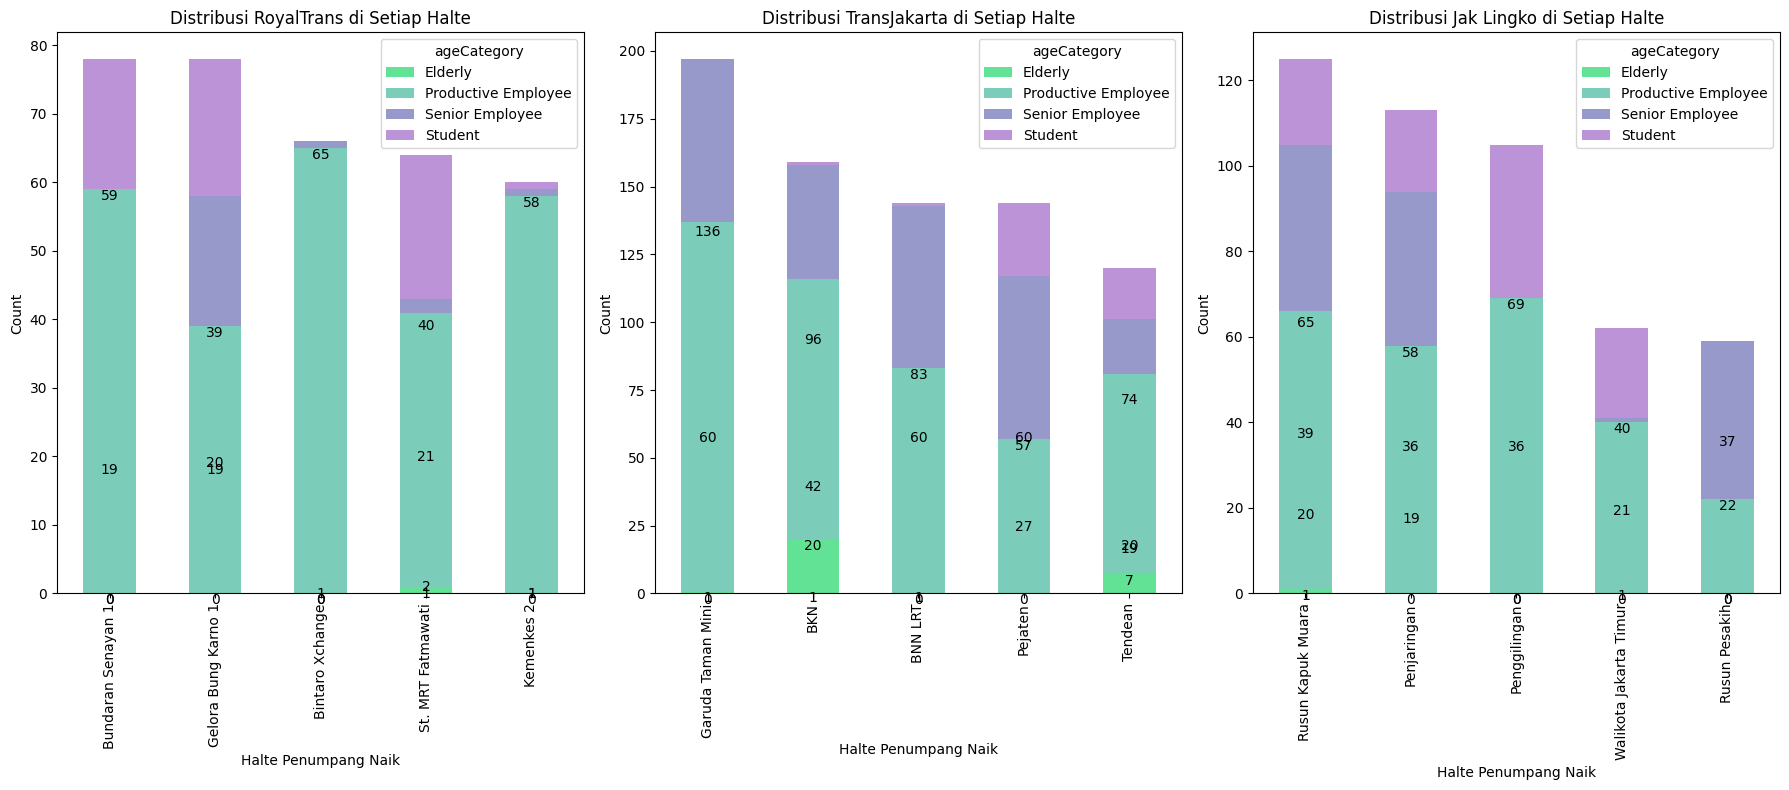

In [ ]:
def make_subplot(transType, position):
    plt.subplot(1, 3, position)
    pivot = df[df['transType'] == transType].pivot_table(index='tapInStopsName', columns='ageCategory', aggfunc='size', fill_value=0)

    top_stops_names = pivot.sum(axis=1).nlargest(5).index
    top_stops = pivot.loc[top_stops_names]

    colors = ['#61E294', '#7BCDBA', '#9799CA', '#BD93D8']
    ax = top_stops.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
    plt.title(f'Distribusi {transType} di Setiap Halte')
    plt.xlabel('Halte Penumpang Naik')
    plt.ylabel('Count')

    for idx, rect in enumerate(ax.patches):
        height = rect.get_height()
        width = rect.get_x() + rect.get_width() / 2.
        label = int(height)
        ax.text(width, height, label, ha='center', va='top')

plt.figure(figsize=(18, 8))
make_subplot('RoyalTrans', 1)
make_subplot('TransJakarta', 2)
make_subplot('Jak Lingko', 3)
plt.tight_layout()
plt.show()

Halte Transportasi Umum PT. TransJakarta dengan banyaknya penumpang lansia turun

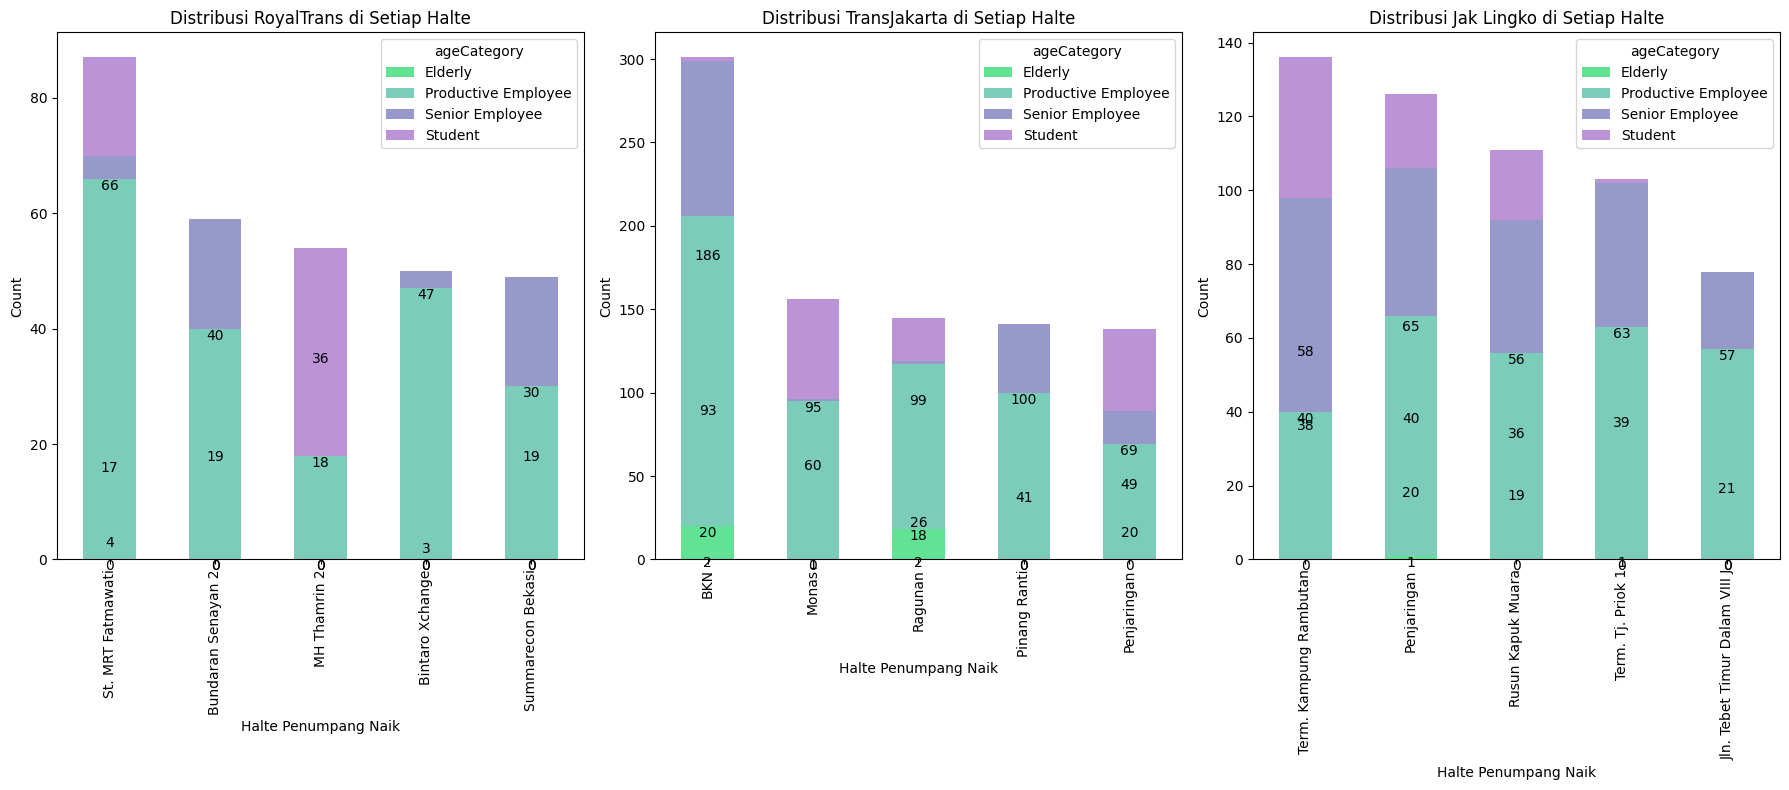

In [ ]:
def make_subplot(transType, position):
    plt.subplot(1, 3, position)
    pivot = tj[tj['transType'] == transType].pivot_table(index='tapOutStopsName', columns='ageCategory', aggfunc='size', fill_value=0)

    top_stops_names = pivot.sum(axis=1).nlargest(5).index
    top_stops = pivot.loc[top_stops_names]

    colors = ['#61E294', '#7BCDBA', '#9799CA', '#BD93D8']
    ax = top_stops.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
    plt.title(f'Distribusi {transType} di Setiap Halte')
    plt.xlabel('Halte Penumpang Naik')
    plt.ylabel('Count')

    for idx, rect in enumerate(ax.patches):
        height = rect.get_height()
        width = rect.get_x() + rect.get_width() / 2.
        label = int(height)
        ax.text(width, height, label, ha='center', va='top')

plt.figure(figsize=(18, 8))
make_subplot('RoyalTrans', 1)
make_subplot('TransJakarta', 2)
make_subplot('Jak Lingko', 3)
plt.tight_layout()
plt.show()

# **Conclusion**


Dasar dari analisis dataset Transjakarta bulan April ini adalah upaya konsisten PT. TransJakarta dalam mengatasi kemacetan dan meningkatkan fasilitas halte. Untuk mencapai konsistensi ini, analis melakukan penelitian lebih lanjut terhadap Halte Tersibuk, Halte yang digunakan secara dominan oleh Wanita dan Lansia

Halte tersibuk:
1. Berdasarkan data diatas, terlihat bahwa Transjakarta menjadi moda transportasi umum terfavorit di Jakarta pada bulan April 2023, diikuti oleh Jak Lingko dan RoyalTrans. Faktor utama yang mendorong preferensi ini kemungkinan besar adalah faktor ekonomi dan efektivitas.
  - Transjakarta: Tarifnya relatif terjangkau, yaitu Rp 3.500. Jaringannya luas dan menjangkau banyak wilayah di Jakarta.
  - Jak Lingko: Gratis untuk digunakan, sehingga menawarkan opsi yang lebih hemat.
  - RoyalTrans: Tarifnya lebih mahal, yaitu Rp 20.000. Jaringannya tidak seluas Transjakarta dan Jak Lingko.

  Oleh karena itu, masyarakat lebih memilih Transjakarta dan Jak Lingko karena menawarkan solusi transportasi yang lebih ekonomis dan efektif untuk kebutuhan sehari-hari

2. Berdasarkan grafik rute/koridor pada bulan April 2023, berikut adalah ringkasan rute/koridor dengan penumpang terbanyak untuk setiap jenis angkutan:
  - RoyalTrans:
    - Cibubur - Balai Kota
    - Bekasi Barat - Kuningan
    - Palem Semi - Bundaran Senayan

  - TransJakarta:
    - Ciputat - CSW
    - Harmoni - Jakarta International Stadium
    - Pulo Gadung - Monas
  
  - Jak Lingko:
    - Kampung Rambutan - Pondok Gede
    - Rusun Pondok Bambu - Walikota Jakarta Timur
    - Rusun Rawa Bebek - Kodamar

  Kesimpulan:
    - RoyalTrans: Digunakan oleh masyarakat yang bertempat tinggal di kota-kota penunjang Jakarta (Kabupaten Bogor, Bekasi, dan Tangerang) dan berkegiatan di Jakarta.
    - TransJakarta: Banyak digunakan oleh masyarakat yang memiliki tujuan lintas Jakarta antar Kota Administrasi Jakarta.
    - Jak Lingko: Digunakan oleh masyarakat yang berkegiatan di sekitar kota atau kecamatan setempat.

3. Pengguna RoyalTrans dan TransJakarta didominasi oleh halte di sekitar Jakarta Pusat dan Jakarta Selatan yang merupakan area perkantoran utama di Jakarta. Untuk Transportasi Umum Jak Lingko didominasi oleh daerah Jakarta Timur dan Utara, hal itu bisa di sebabkan masyarakat sana banyak beraktifitas di daerah sana.

4. Dari grafik penumpang turun dapat diketahui bahwa,
  - RoyalTrans:
    - Penumpang didominasi turun di Jakarta Selatan, menunjukkan pengguna RoyalTrans tidak selalu bepergian lintas antar kota.
    - Halte Bintaro Xchange dan Summarecon Bekasi menunjukkan pengguna RoyalTrans berasal dari luar Jakarta.

  - TransJakarta:
    - Penumpang didominasi turun di Jakarta Pusat, Selatan, dan Timur, menunjukkan pengguna TransJakarta bertempat tinggal dan beraktivitas di Jakarta.

  - Jak Lingko:
    - Penumpang didominasi turun di Jakarta Utara dan Timur, menunjukkan pengguna Jak Lingko beraktivitas di area tersebut.
    - Penurunan di Lebak Bulus menunjukkan kemungkinan pengguna melanjutkan perjalanan dengan terminal Lebak Bulus atau bertempat tinggal di sana.

5. Berdasarkan grafik harian dapat diketahui bahwa,
  - TransJakarta: Memiliki jumlah penumpang terbanyak, dengan hari sibuk Senin hingga Jumat dan puncak tersibuk di hari Jumat. Penurunan drastis terjadi di hari Sabtu dan Minggu.
  - Jak Lingko: Hari sibuk sama dengan TransJakarta, dengan puncak tersibuk di hari Kamis.
  - RoyalTrans: Hari sibuk sama dengan TransJakarta, dengan puncak tersibuk di hari Selasa dan Jumat.

6. Ketiga jenis angkutan memiliki pola yang sama:
  - Puncak pertama di jam 6 pagi (masuk sekolah)
  - Turun di jam 7 pagi
  - Konstan sampai jam 9 pagi
  - Turun drastis di jam 10 pagi
  - Puncak kedua di jam 4 sore (pulang sekolah & kerja)
  - Puncak tertinggi di jam 5 sore
  - Turun di jam 6 sore sampai 9 malam (pekerja lembur)

7. Berdasarkan grafik jam puncak dapat diketahui bahwa,

  - Koridor Tersibuk TransJakarta:
    - Pulo Gadung - Monas
    - Ciputat - CSW
    - Harmoni - Jakarta International Stadium

  - Koridor Tersibuk RoyalTrans:
    - Cibubur - Balai Kota
    - Palem Semi - Bundaran Senayan
    - Bekasi Barat - Kuningan

  - Koridor Tersibuk Jak Lingko:
    - Rawa Bebek - Kodamar
    - Rusun Pondok Bambu - Walikota Jakarta Timur
    - Kampung Rambutan - Pondok
    
  - Urutan Penggunaan Angkutan:
    - TransJakarta
    - Jak Lingko
    - RoyalTrans

8. Dari data diatas dapat diketahui halte tersibuk pada saat jam puncak ( 6 - 10 pagi dan sore hari jam 4 sore - 10) adalah,

  Halte Tersibuk saat penumpang naik:
    - TransJakarta:
      - BNN LRT
      - Garuda Taman Mini
      - BKN
    - RoyalTrans:
      - Bintaro Xchange
      - Gelora Bung Karno 1
      - Bundaran Senayan 1
    - Jak Lingko:
      - Penggilingan
      - Rusun Kapuk Muara
      - Penjaringan

  Dan, halte tersibuk saat penumpang turun
  - TransJakarta:
    - Ragunan
    - BKN
    - Monas
  - RoyalTrans:
    - MH Thamrin 2
    - St. MRT Fatmawati
    - Bundaran Senayan 2
  - Jak Lingko:
    - Rusun Kapuk Muara
    - Penjaringan
    - Term. Kampung Rambutan

  Dengan urutan penggunaan angkutan:

  - Naik:
    - TransJakarta
    - Jak Lingko
    - RoyalTrans
  - Turun:
    - TransJakarta
    - Jak Lingko
    - RoyalTrans

9. Bisa di tarik garis, bahwa rute yang bisa menyebabkan kemacetan karena banyaknya penumpang di jam puncak keramaian ada pada rute 'Pulo Gadung - Monas' , 'Harmoni - Jakarta International Stadium' dan 'Ciputat - CSW'. Dan halte yang memiliki kepadatan tertinggi ada pada 'BKN', 'Ragunan', dan 'Monas

Halte Pengguna Wanita dan Lansia di Halte Tersibuk

Pengguna Wanita:
  - Dominan di semua jenis TransJakarta.
  - Pengguna terbanyak di halte tersibuk:
    - BKN
    - Ragunan
    - Monas

Pengguna Lansia:
  - Sangat sedikit yang menggunakan TransJakarta.
  - Jumlah penumpang lansia di halte tersibuk tergolong sedikit, Paling banyak 20 penumpang di halte BKN

# **Rekomendasi**

1. Menambahkan rute baru dan jalan layang: Mengalihkan kepadatan dari rute yang ramai dan mempercepat mobilisasi penumpang.
2. Analisis global kemacetan Jakarta: Memahami porsi TransJakarta dalam kemacetan dan merumuskan solusi terintegrasi.
3. Menambahkan halte bayangan: Mengurangi penumpukan antrian di halte yang ramai.
4. Membangun halte terintegrasi: Menggabungkan halte dengan stasiun LRT/MRT untuk meningkatkan integrasi antar moda transportasi.
5. Menyediakan jasa advertisement pada halte-halte yang padat: Meningkatkan laba PT. TransJakarta.
6. Menambahkan jalur khusus wanita dan lansia: Meningkatkan kenyamanan dan keamanan bagi penumpang.

Dengan menjalankan rekomendasi di atas, PT. TransJakarta dapat meningkatkan konsistensinya dalam mengatasi kemacetan dan meningkatkan fasilitas halte, sehingga dapat meningkatkan pengguna TransJakarta dan income perusahaan.

In [ ]:
df.to_csv('/content/drive/My Drive/df.csv', index=False)